In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from glob import glob
import tifffile
from tqdm import tqdm

### Saving cropped masks and raw data in a directory for future data loading

In [2]:
root_dir = '/mnt/efs/shared_data/instance_no_gt/20230830_TIF_cellpose_test/'
crop_size = 156
mask_crops_dir = os.path.join(root_dir, 'cropped_masks')
raw_crops_dir = os.path.join(root_dir, 'cropped_rawfiles')

# using root_dir, split and mask create a path to files and sort it 
mask_files = sorted(glob(os.path.join(root_dir, 'masks', 'masks*.tif'))) # load mask files into sorted list
raw_files = sorted(glob(os.path.join(root_dir, 'raw_files', 'raw*.tif'))) # load image files into sorted list

def get_centroids(mask):
    ids = np.unique(mask)
    ids = ids[1:]
    centroids = []
    for id in ids:
        y,x = np.where(mask == id)
        xm = int(np.mean(x))
        ym = int(np.mean(y))
        centroid = (ym, xm)
        centroids.append(centroid)
    
    centroids = np.array(centroids)
    return centroids
    
def crop_top_left(coord): 
    y, x = coord
    y_top_left = int(y-(crop_size//2))
    x_top_left = int(x-(crop_size//2))
    return y_top_left, x_top_left

In [5]:
for i in tqdm(range(len(raw_files))):
    raw = tifffile.imread(raw_files[i])
    mask = tifffile.imread(mask_files[i])
    centroids = get_centroids(mask)

    # Scraping tile number from raw_files
    tile_number = str.split(os.path.basename(raw_files[i]),'_')[3]
    print(tile_number)
    for centroid in centroids:
        y_top_left, x_top_left = crop_top_left(centroid)
        crop_mask = mask[y_top_left:y_top_left+crop_size, x_top_left:x_top_left+crop_size]
        if crop_mask.shape == (crop_size, crop_size):
            crop_mask = (crop_mask == crop_mask[int(crop_size//2), int(crop_size//2)])
            crop_raw = raw[y_top_left:y_top_left+crop_size, x_top_left:x_top_left+crop_size]
            tifffile.imwrite(mask_crops_dir+f'/Tile{tile_number}_y{int(centroid[0])}_x{int(centroid[1])}.tif', crop_mask)
            tifffile.imwrite(raw_crops_dir+f'/Tile{tile_number}_y{int(centroid[0])}_x{int(centroid[1])}.tif', crop_raw)


  0%|▏                                                                                               | 2/962 [00:00<02:04,  7.68it/s]

00001
00002
00003


  0%|▍                                                                                               | 4/962 [00:00<01:29, 10.72it/s]

00004
00005


  1%|▌                                                                                               | 6/962 [00:00<01:53,  8.43it/s]

00006
00007


  1%|▋                                                                                               | 7/962 [00:00<02:05,  7.58it/s]

00008
00009


  1%|▉                                                                                               | 9/962 [00:07<23:05,  1.45s/it]

00010


  1%|▉                                                                                            | 10/962 [00:26<1:29:08,  5.62s/it]

00011


  1%|█                                                                                            | 11/962 [00:47<2:25:51,  9.20s/it]

00012


  1%|█▏                                                                                           | 12/962 [01:04<3:01:40, 11.47s/it]

00013


  1%|█▎                                                                                           | 13/962 [01:20<3:18:32, 12.55s/it]

00014


  1%|█▎                                                                                           | 14/962 [01:27<2:52:13, 10.90s/it]

00015


  2%|█▌                                                                                           | 16/962 [01:27<1:29:39,  5.69s/it]

00016
00017
00018


  2%|█▉                                                                                             | 20/962 [01:28<30:28,  1.94s/it]

00019
00020
00021
00022


  2%|██▎                                                                                            | 24/962 [01:28<13:30,  1.16it/s]

00023
00024
00025


  3%|██▌                                                                                            | 26/962 [01:28<09:38,  1.62it/s]

00026
00027


  3%|██▉                                                                                            | 30/962 [01:28<05:05,  3.06it/s]

00028
00029
00030


  3%|███▏                                                                                           | 32/962 [01:29<03:56,  3.93it/s]

00031
00032
00033
00034


  4%|███▌                                                                                           | 36/962 [01:29<02:42,  5.71it/s]

00035
00036
00037
00038


  4%|███▊                                                                                           | 38/962 [01:37<19:45,  1.28s/it]

00039


  4%|███▊                                                                                         | 39/962 [02:01<1:23:50,  5.45s/it]

00040


  4%|███▊                                                                                         | 40/962 [02:22<2:11:22,  8.55s/it]

00041


  4%|███▉                                                                                         | 41/962 [02:45<3:00:52, 11.78s/it]

00042


  4%|████                                                                                         | 42/962 [03:15<4:09:29, 16.27s/it]

00043


  4%|████▏                                                                                        | 43/962 [03:38<4:35:08, 17.96s/it]

00044


  5%|████▎                                                                                        | 44/962 [04:00<4:51:31, 19.05s/it]

00045


  5%|████▌                                                                                        | 47/962 [04:05<2:08:34,  8.43s/it]

00046
00047
00048


  5%|████▉                                                                                          | 50/962 [04:05<58:34,  3.85s/it]

00049
00050
00051


  5%|█████▏                                                                                         | 52/962 [04:06<37:39,  2.48s/it]

00052
00053


  6%|█████▎                                                                                         | 54/962 [04:06<25:12,  1.67s/it]

00054
00055


  6%|█████▍                                                                                         | 55/962 [04:06<20:42,  1.37s/it]

00056


  6%|█████▌                                                                                         | 56/962 [04:09<27:47,  1.84s/it]

00057


  6%|█████▌                                                                                       | 57/962 [04:25<1:15:29,  5.01s/it]

00058


  6%|█████▌                                                                                       | 58/962 [04:43<2:08:45,  8.55s/it]

00059


  6%|█████▋                                                                                       | 59/962 [04:59<2:35:45, 10.35s/it]

00060


  6%|█████▊                                                                                       | 60/962 [05:12<2:46:40, 11.09s/it]

00061


  6%|█████▉                                                                                       | 61/962 [05:37<3:45:23, 15.01s/it]

00062


  6%|█████▉                                                                                       | 62/962 [06:02<4:30:17, 18.02s/it]

00063


  7%|██████                                                                                       | 63/962 [06:32<5:22:17, 21.51s/it]

00064


  7%|██████▏                                                                                      | 64/962 [06:54<5:23:37, 21.62s/it]

00065


  7%|██████▎                                                                                      | 65/962 [07:20<5:40:43, 22.79s/it]

00066


  7%|██████▍                                                                                      | 66/962 [07:45<5:50:39, 23.48s/it]

00067


  7%|██████▍                                                                                      | 67/962 [08:01<5:18:22, 21.34s/it]

00068


  7%|██████▌                                                                                      | 68/962 [08:02<3:45:28, 15.13s/it]

00069
00070


  7%|██████▉                                                                                      | 72/962 [08:02<1:14:19,  5.01s/it]

00071
00072


  8%|███████▎                                                                                       | 74/962 [08:02<47:48,  3.23s/it]

00073
00074
00075


  8%|███████▌                                                                                       | 76/962 [08:03<30:00,  2.03s/it]

00076
00077


  8%|███████▉                                                                                       | 80/962 [08:03<12:21,  1.19it/s]

00078
00079
00080


  9%|████████                                                                                       | 82/962 [08:03<08:34,  1.71it/s]

00081
00082
00083


  9%|████████▍                                                                                      | 86/962 [08:03<04:26,  3.29it/s]

00084
00085
00086
00087
00088


  9%|████████▋                                                                                      | 88/962 [08:04<05:37,  2.59it/s]

00089


  9%|████████▊                                                                                      | 89/962 [08:17<37:12,  2.56s/it]

00090


  9%|████████▋                                                                                    | 90/962 [08:39<1:35:22,  6.56s/it]

00091


  9%|████████▊                                                                                    | 91/962 [09:03<2:33:03, 10.54s/it]

00092


 10%|████████▉                                                                                    | 92/962 [09:31<3:37:21, 14.99s/it]

00093


 10%|████████▉                                                                                    | 93/962 [09:59<4:24:05, 18.23s/it]

00094


 10%|█████████                                                                                    | 94/962 [10:34<5:31:59, 22.95s/it]

00095


 10%|█████████▏                                                                                   | 95/962 [11:05<6:02:15, 25.07s/it]

00096


 10%|█████████▎                                                                                   | 96/962 [11:34<6:18:40, 26.24s/it]

00097


 10%|█████████▍                                                                                   | 97/962 [12:03<6:29:09, 26.99s/it]

00098


 10%|█████████▍                                                                                   | 98/962 [12:40<7:12:06, 30.01s/it]

00099


 10%|█████████▌                                                                                   | 99/962 [13:17<7:37:52, 31.83s/it]

00100


 10%|█████████▌                                                                                  | 100/962 [14:00<8:26:26, 35.25s/it]

00101


 10%|█████████▋                                                                                  | 101/962 [14:29<8:01:14, 33.54s/it]

00102


 11%|█████████▊                                                                                  | 103/962 [14:35<4:12:37, 17.64s/it]

00103
00104


 11%|██████████                                                                                  | 105/962 [14:35<2:05:20,  8.78s/it]

00105
00106


 11%|██████████▏                                                                                 | 106/962 [14:36<1:31:20,  6.40s/it]

00107


 11%|██████████▏                                                                                 | 107/962 [15:00<2:44:28, 11.54s/it]

00108


 11%|██████████▎                                                                                 | 108/962 [15:51<5:35:07, 23.54s/it]

00109


 11%|██████████▍                                                                                 | 109/962 [16:44<7:38:40, 32.26s/it]

00110


 11%|██████████▌                                                                                 | 110/962 [17:36<9:04:47, 38.37s/it]

00111


 12%|██████████▌                                                                                 | 111/962 [18:27<9:57:25, 42.12s/it]

00112


 12%|██████████▋                                                                                 | 112/962 [19:08<9:49:40, 41.62s/it]

00113


 12%|██████████▊                                                                                 | 113/962 [19:37<8:55:25, 37.84s/it]

00114


 12%|██████████▉                                                                                 | 114/962 [20:02<8:01:18, 34.05s/it]

00115


 12%|██████████▉                                                                                 | 115/962 [20:38<8:07:19, 34.52s/it]

00116


 12%|███████████                                                                                 | 116/962 [21:15<8:17:57, 35.32s/it]

00117


 12%|███████████▏                                                                                | 117/962 [21:51<8:22:28, 35.68s/it]

00118


 12%|███████████▎                                                                                | 118/962 [22:21<7:57:04, 33.91s/it]

00119


 12%|███████████▎                                                                               | 119/962 [24:03<12:41:33, 54.20s/it]

00120


 12%|███████████▎                                                                               | 120/962 [24:23<10:18:30, 44.07s/it]

00121


 13%|███████████▌                                                                                | 121/962 [24:31<7:47:28, 33.35s/it]

00122


 13%|███████████▊                                                                                | 123/962 [24:33<3:53:23, 16.69s/it]

00123
00124


 13%|███████████▉                                                                                | 125/962 [24:33<1:55:33,  8.28s/it]

00125


 13%|████████████                                                                                | 126/962 [24:34<1:21:48,  5.87s/it]

00126
00127


 13%|████████████▌                                                                                 | 128/962 [24:34<41:28,  2.98s/it]

00128
00129


 14%|████████████▋                                                                                 | 130/962 [24:35<21:52,  1.58s/it]

00130


 14%|████████████▊                                                                                 | 131/962 [24:35<16:01,  1.16s/it]

00131


 14%|████████████▉                                                                                 | 132/962 [24:35<12:25,  1.11it/s]

00132


 14%|████████████▉                                                                                 | 133/962 [24:35<09:22,  1.47it/s]

00133
00134


 14%|█████████████▏                                                                                | 135/962 [24:36<05:54,  2.33it/s]

00135


 14%|█████████████▎                                                                                | 136/962 [24:36<04:50,  2.84it/s]

00136
00137


 14%|█████████████▍                                                                                | 137/962 [24:38<12:29,  1.10it/s]

00138


 14%|█████████████▍                                                                                | 138/962 [24:45<37:57,  2.76s/it]

00139


 14%|█████████████▎                                                                              | 139/962 [25:03<1:38:21,  7.17s/it]

00140


 15%|█████████████▍                                                                              | 140/962 [25:27<2:50:54, 12.47s/it]

00141


 15%|█████████████▍                                                                              | 141/962 [25:52<3:40:25, 16.11s/it]

00142


 15%|█████████████▌                                                                              | 142/962 [26:19<4:24:59, 19.39s/it]

00143


 15%|█████████████▋                                                                              | 143/962 [26:53<5:24:01, 23.74s/it]

00144


 15%|█████████████▊                                                                              | 144/962 [27:33<6:30:32, 28.65s/it]

00145


 15%|█████████████▊                                                                              | 145/962 [28:18<7:38:32, 33.67s/it]

00146


 15%|█████████████▉                                                                              | 146/962 [28:59<8:06:52, 35.80s/it]

00147


 15%|██████████████                                                                              | 147/962 [29:31<7:49:34, 34.57s/it]

00148


 15%|██████████████▏                                                                             | 148/962 [30:01<7:30:43, 33.22s/it]

00149


 15%|██████████████▏                                                                             | 149/962 [30:39<7:49:22, 34.64s/it]

00150


 16%|██████████████▎                                                                             | 150/962 [31:26<8:41:32, 38.54s/it]

00151


 16%|██████████████▍                                                                             | 151/962 [32:17<9:28:56, 42.09s/it]

00152


 16%|██████████████▌                                                                             | 152/962 [33:01<9:38:19, 42.84s/it]

00153


 16%|██████████████▍                                                                            | 153/962 [33:50<10:00:43, 44.55s/it]

00154


 16%|██████████████▌                                                                            | 154/962 [34:36<10:07:07, 45.08s/it]

00155


 16%|██████████████▉                                                                             | 156/962 [34:48<5:28:42, 24.47s/it]

00156


 16%|███████████████                                                                             | 157/962 [34:48<3:51:01, 17.22s/it]

00157
00158


 16%|███████████████                                                                             | 158/962 [35:13<4:23:23, 19.66s/it]

00159


 17%|███████████████▏                                                                            | 159/962 [36:04<6:28:50, 29.05s/it]

00160


 17%|███████████████▎                                                                            | 160/962 [36:51<7:39:01, 34.34s/it]

00161


 17%|███████████████▍                                                                            | 161/962 [37:35<8:19:07, 37.39s/it]

00162


 17%|███████████████▍                                                                            | 162/962 [38:19<8:44:56, 39.37s/it]

00163


 17%|███████████████▌                                                                            | 163/962 [38:59<8:47:16, 39.59s/it]

00164


 17%|███████████████▋                                                                            | 164/962 [39:32<8:17:04, 37.37s/it]

00165


 17%|███████████████▊                                                                            | 165/962 [40:08<8:10:33, 36.93s/it]

00166


 17%|███████████████▉                                                                            | 166/962 [40:44<8:09:10, 36.87s/it]

00167


 17%|███████████████▉                                                                            | 167/962 [41:24<8:19:33, 37.70s/it]

00168


 17%|████████████████                                                                            | 168/962 [42:00<8:13:53, 37.32s/it]

00169


 18%|████████████████▏                                                                           | 169/962 [42:38<8:14:37, 37.42s/it]

00170


 18%|████████████████▎                                                                           | 170/962 [43:13<8:02:26, 36.55s/it]

00171


 18%|████████████████▎                                                                           | 171/962 [43:35<7:06:33, 32.36s/it]

00172


 18%|████████████████▍                                                                           | 172/962 [43:55<6:16:41, 28.61s/it]

00173


 18%|████████████████▌                                                                           | 173/962 [44:18<5:55:46, 27.06s/it]

00174


 18%|████████████████▋                                                                           | 174/962 [44:36<5:17:45, 24.19s/it]

00175


 18%|████████████████▋                                                                           | 175/962 [44:52<4:45:25, 21.76s/it]

00176


 18%|████████████████▊                                                                           | 176/962 [45:10<4:29:21, 20.56s/it]

00177


 19%|█████████████████                                                                           | 179/962 [45:15<1:43:10,  7.91s/it]

00178
00179


 19%|█████████████████▏                                                                          | 180/962 [45:16<1:12:50,  5.59s/it]

00180


 19%|█████████████████▊                                                                            | 182/962 [45:16<36:36,  2.82s/it]

00181
00182


 19%|█████████████████▉                                                                            | 183/962 [45:16<26:30,  2.04s/it]

00183


 19%|█████████████████▉                                                                            | 184/962 [45:16<19:31,  1.51s/it]

00184


 19%|██████████████████▏                                                                           | 186/962 [45:17<10:35,  1.22it/s]

00185
00186


 19%|██████████████████▎                                                                           | 187/962 [45:17<07:58,  1.62it/s]

00187
00188


 20%|██████████████████▎                                                                           | 188/962 [45:26<39:36,  3.07s/it]

00189


 20%|██████████████████                                                                          | 189/962 [45:51<2:05:45,  9.76s/it]

00190


 20%|██████████████████▏                                                                         | 190/962 [46:23<3:30:36, 16.37s/it]

00191


 20%|██████████████████▎                                                                         | 191/962 [46:51<4:16:43, 19.98s/it]

00192


 20%|██████████████████▎                                                                         | 192/962 [47:12<4:18:22, 20.13s/it]

00193


 20%|██████████████████▍                                                                         | 193/962 [47:28<4:04:14, 19.06s/it]

00194


 20%|██████████████████▌                                                                         | 194/962 [47:52<4:20:46, 20.37s/it]

00195


 20%|██████████████████▋                                                                         | 195/962 [48:21<4:55:24, 23.11s/it]

00196


 20%|██████████████████▋                                                                         | 196/962 [48:36<4:22:15, 20.54s/it]

00197


 20%|██████████████████▊                                                                         | 197/962 [48:39<3:15:08, 15.31s/it]

00198


 21%|██████████████████▉                                                                         | 198/962 [49:03<3:49:32, 18.03s/it]

00199


 21%|███████████████████                                                                         | 199/962 [49:36<4:47:29, 22.61s/it]

00200


 21%|███████████████████▏                                                                        | 200/962 [50:07<5:17:16, 24.98s/it]

00201


 21%|███████████████████▏                                                                        | 201/962 [50:34<5:24:22, 25.58s/it]

00202


 21%|███████████████████▎                                                                        | 202/962 [51:05<5:44:32, 27.20s/it]

00203


 21%|███████████████████▍                                                                        | 203/962 [51:39<6:11:47, 29.39s/it]

00204


 21%|███████████████████▌                                                                        | 204/962 [52:05<5:55:46, 28.16s/it]

00205


 21%|███████████████████▌                                                                        | 205/962 [52:35<6:02:39, 28.74s/it]

00206


 21%|███████████████████▋                                                                        | 206/962 [53:17<6:52:18, 32.72s/it]

00207


 22%|███████████████████▊                                                                        | 207/962 [53:32<5:44:31, 27.38s/it]

00208


 22%|███████████████████▉                                                                        | 208/962 [53:32<4:02:38, 19.31s/it]

00209


 22%|███████████████████▉                                                                        | 209/962 [53:33<2:52:30, 13.75s/it]

00210


 22%|████████████████████                                                                        | 210/962 [53:53<3:14:11, 15.49s/it]

00211


 22%|████████████████████▏                                                                       | 211/962 [54:20<3:59:45, 19.16s/it]

00212


 22%|████████████████████▎                                                                       | 212/962 [54:29<3:21:18, 16.11s/it]

00213


 22%|████████████████████▎                                                                       | 213/962 [54:34<2:39:45, 12.80s/it]

00214


 22%|████████████████████▍                                                                       | 214/962 [54:58<3:21:56, 16.20s/it]

00215


 22%|████████████████████▌                                                                       | 215/962 [55:22<3:50:11, 18.49s/it]

00216


 22%|████████████████████▋                                                                       | 216/962 [55:47<4:12:41, 20.32s/it]

00217


 23%|████████████████████▊                                                                       | 217/962 [56:20<4:58:34, 24.05s/it]

00218


 23%|████████████████████▊                                                                       | 218/962 [56:54<5:38:25, 27.29s/it]

00219


 23%|████████████████████▉                                                                       | 219/962 [57:08<4:48:21, 23.29s/it]

00220


 23%|█████████████████████                                                                       | 220/962 [57:11<3:32:46, 17.21s/it]

00221


 23%|█████████████████████▏                                                                      | 221/962 [57:25<3:20:09, 16.21s/it]

00222


 23%|█████████████████████▏                                                                      | 222/962 [57:52<4:00:26, 19.49s/it]

00223


 23%|█████████████████████▎                                                                      | 223/962 [58:19<4:24:57, 21.51s/it]

00224


 23%|█████████████████████▍                                                                      | 224/962 [58:37<4:12:02, 20.49s/it]

00225


 23%|█████████████████████▌                                                                      | 225/962 [59:08<4:50:25, 23.64s/it]

00226


 23%|█████████████████████▌                                                                      | 226/962 [59:36<5:07:15, 25.05s/it]

00227


 24%|█████████████████████▏                                                                    | 227/962 [1:00:02<5:09:28, 25.26s/it]

00228


 24%|█████████████████████▎                                                                    | 228/962 [1:00:19<4:37:36, 22.69s/it]

00229


 24%|█████████████████████▌                                                                    | 230/962 [1:00:24<2:29:10, 12.23s/it]

00230
00231


 24%|██████████████████████▎                                                                     | 233/962 [1:00:24<52:23,  4.31s/it]

00232
00233


 24%|██████████████████████▍                                                                     | 234/962 [1:00:25<37:21,  3.08s/it]

00234


 24%|██████████████████████▍                                                                     | 235/962 [1:00:25<26:59,  2.23s/it]

00235


 25%|██████████████████████▌                                                                     | 236/962 [1:00:25<19:38,  1.62s/it]

00236


 25%|██████████████████████▋                                                                     | 237/962 [1:00:25<14:37,  1.21s/it]

00237


 25%|██████████████████████▊                                                                     | 238/962 [1:00:26<11:04,  1.09it/s]

00238
00239


 25%|██████████████████████▊                                                                     | 239/962 [1:00:26<10:38,  1.13it/s]

00240


 25%|██████████████████████▉                                                                     | 240/962 [1:00:40<57:06,  4.75s/it]

00241


 25%|██████████████████████▌                                                                   | 241/962 [1:01:05<2:08:46, 10.72s/it]

00242


 25%|██████████████████████▋                                                                   | 242/962 [1:01:30<3:01:43, 15.14s/it]

00243


 25%|██████████████████████▋                                                                   | 243/962 [1:01:57<3:43:03, 18.61s/it]

00244


 25%|██████████████████████▊                                                                   | 244/962 [1:02:28<4:27:21, 22.34s/it]

00245


 25%|██████████████████████▉                                                                   | 245/962 [1:02:57<4:51:19, 24.38s/it]

00246


 26%|███████████████████████                                                                   | 246/962 [1:03:25<5:02:51, 25.38s/it]

00247


 26%|███████████████████████                                                                   | 247/962 [1:03:56<5:22:44, 27.08s/it]

00248


 26%|███████████████████████▏                                                                  | 248/962 [1:04:25<5:30:28, 27.77s/it]

00249


 26%|███████████████████████▎                                                                  | 249/962 [1:04:53<5:29:11, 27.70s/it]

00250


 26%|███████████████████████▍                                                                  | 250/962 [1:05:26<5:46:45, 29.22s/it]

00251


 26%|███████████████████████▍                                                                  | 251/962 [1:05:59<6:03:06, 30.64s/it]

00252


 26%|███████████████████████▌                                                                  | 252/962 [1:06:32<6:08:10, 31.11s/it]

00253


 26%|███████████████████████▋                                                                  | 253/962 [1:07:07<6:22:46, 32.39s/it]

00254


 26%|███████████████████████▊                                                                  | 254/962 [1:07:35<6:05:29, 30.97s/it]

00255


 27%|███████████████████████▊                                                                  | 255/962 [1:07:51<5:14:05, 26.66s/it]

00256


 27%|███████████████████████▉                                                                  | 256/962 [1:07:54<3:47:44, 19.35s/it]

00257


 27%|████████████████████████                                                                  | 257/962 [1:08:01<3:04:26, 15.70s/it]

00258


 27%|████████████████████████▏                                                                 | 258/962 [1:08:45<4:45:10, 24.30s/it]

00259


 27%|████████████████████████▏                                                                 | 259/962 [1:09:14<5:00:34, 25.65s/it]

00260


 27%|████████████████████████▎                                                                 | 260/962 [1:09:16<3:35:53, 18.45s/it]

00261


 27%|████████████████████████▍                                                                 | 261/962 [1:09:17<2:33:57, 13.18s/it]

00262


 27%|████████████████████████▌                                                                 | 262/962 [1:09:44<3:23:58, 17.48s/it]

00263


 27%|████████████████████████▌                                                                 | 263/962 [1:10:32<5:08:52, 26.51s/it]

00264


 27%|████████████████████████▋                                                                 | 264/962 [1:10:41<4:07:08, 21.24s/it]

00265


 28%|████████████████████████▊                                                                 | 265/962 [1:10:44<3:06:02, 16.01s/it]

00266


 28%|████████████████████████▉                                                                 | 266/962 [1:11:09<3:36:39, 18.68s/it]

00267


 28%|████████████████████████▉                                                                 | 267/962 [1:11:43<4:28:38, 23.19s/it]

00268


 28%|█████████████████████████                                                                 | 268/962 [1:12:15<4:58:32, 25.81s/it]

00269


 28%|█████████████████████████▏                                                                | 269/962 [1:12:53<5:39:53, 29.43s/it]

00270


 28%|█████████████████████████▎                                                                | 270/962 [1:13:27<5:57:16, 30.98s/it]

00271


 28%|█████████████████████████▎                                                                | 271/962 [1:14:00<6:03:33, 31.57s/it]

00272


 28%|█████████████████████████▍                                                                | 272/962 [1:14:29<5:52:54, 30.69s/it]

00273


 28%|█████████████████████████▌                                                                | 273/962 [1:15:03<6:04:32, 31.75s/it]

00274


 28%|█████████████████████████▋                                                                | 274/962 [1:15:37<6:10:14, 32.29s/it]

00275


 29%|█████████████████████████▋                                                                | 275/962 [1:16:07<6:02:23, 31.65s/it]

00276


 29%|█████████████████████████▊                                                                | 276/962 [1:16:40<6:07:08, 32.11s/it]

00277


 29%|█████████████████████████▉                                                                | 277/962 [1:17:12<6:07:36, 32.20s/it]

00278


 29%|██████████████████████████                                                                | 278/962 [1:17:40<5:50:02, 30.71s/it]

00279


 29%|██████████████████████████                                                                | 279/962 [1:18:07<5:36:21, 29.55s/it]

00280


 29%|██████████████████████████▏                                                               | 280/962 [1:18:31<5:19:51, 28.14s/it]

00281


 29%|██████████████████████████▎                                                               | 281/962 [1:18:50<4:45:17, 25.14s/it]

00282


 29%|██████████████████████████▍                                                               | 283/962 [1:18:52<2:24:59, 12.81s/it]

00283
00284


 30%|██████████████████████████▋                                                               | 285/962 [1:18:52<1:11:51,  6.37s/it]

00285
00286


 30%|███████████████████████████▍                                                                | 287/962 [1:18:53<36:11,  3.22s/it]

00287
00288


 30%|███████████████████████████▌                                                                | 288/962 [1:18:53<26:00,  2.32s/it]

00289


 30%|███████████████████████████▋                                                                | 289/962 [1:18:54<20:57,  1.87s/it]

00290


 30%|███████████████████████████▋                                                                | 290/962 [1:18:59<33:41,  3.01s/it]

00291


 30%|███████████████████████████▊                                                                | 291/962 [1:19:08<51:48,  4.63s/it]

00292


 30%|███████████████████████████▎                                                              | 292/962 [1:19:30<1:51:07,  9.95s/it]

00293


 30%|███████████████████████████▍                                                              | 293/962 [1:19:55<2:39:55, 14.34s/it]

00294


 31%|███████████████████████████▌                                                              | 294/962 [1:20:20<3:15:19, 17.54s/it]

00295


 31%|███████████████████████████▌                                                              | 295/962 [1:20:46<3:42:40, 20.03s/it]

00296


 31%|███████████████████████████▋                                                              | 296/962 [1:21:12<4:04:49, 22.06s/it]

00297


 31%|███████████████████████████▊                                                              | 297/962 [1:21:43<4:33:09, 24.65s/it]

00298


 31%|███████████████████████████▉                                                              | 298/962 [1:22:15<4:58:11, 26.94s/it]

00299


 31%|███████████████████████████▉                                                              | 299/962 [1:22:49<5:20:27, 29.00s/it]

00300


 31%|████████████████████████████                                                              | 300/962 [1:23:21<5:30:02, 29.91s/it]

00301


 31%|████████████████████████████▏                                                             | 301/962 [1:23:50<5:24:34, 29.46s/it]

00302


 31%|████████████████████████████▎                                                             | 302/962 [1:24:27<5:50:26, 31.86s/it]

00303


 31%|████████████████████████████▎                                                             | 303/962 [1:25:05<6:09:05, 33.60s/it]

00304


 32%|████████████████████████████▍                                                             | 304/962 [1:25:33<5:51:21, 32.04s/it]

00305


 32%|████████████████████████████▌                                                             | 305/962 [1:26:09<6:04:46, 33.31s/it]

00306


 32%|████████████████████████████▋                                                             | 306/962 [1:26:48<6:20:44, 34.82s/it]

00307


 32%|████████████████████████████▋                                                             | 307/962 [1:27:19<6:07:59, 33.71s/it]

00308


 32%|████████████████████████████▊                                                             | 308/962 [1:27:29<4:52:10, 26.80s/it]

00309


 32%|████████████████████████████▉                                                             | 309/962 [1:27:46<4:18:47, 23.78s/it]

00310


 32%|█████████████████████████████                                                             | 310/962 [1:28:45<6:11:07, 34.15s/it]

00311


 32%|█████████████████████████████                                                             | 311/962 [1:28:56<4:58:02, 27.47s/it]

00312


 33%|█████████████████████████████▎                                                            | 313/962 [1:28:58<2:28:51, 13.76s/it]

00313
00314


 33%|█████████████████████████████▍                                                            | 314/962 [1:29:10<2:23:31, 13.29s/it]

00315


 33%|█████████████████████████████▍                                                            | 315/962 [1:29:52<3:57:58, 22.07s/it]

00316


 33%|█████████████████████████████▌                                                            | 316/962 [1:30:32<4:55:23, 27.44s/it]

00317


 33%|█████████████████████████████▋                                                            | 317/962 [1:31:05<5:12:15, 29.05s/it]

00318


 33%|█████████████████████████████▊                                                            | 318/962 [1:31:46<5:48:13, 32.44s/it]

00319


 33%|█████████████████████████████▊                                                            | 319/962 [1:32:30<6:25:05, 35.93s/it]

00320


 33%|█████████████████████████████▉                                                            | 320/962 [1:33:07<6:29:39, 36.42s/it]

00321


 33%|██████████████████████████████                                                            | 321/962 [1:33:48<6:43:11, 37.74s/it]

00322


 33%|██████████████████████████████                                                            | 322/962 [1:34:31<6:59:02, 39.28s/it]

00323


 34%|██████████████████████████████▏                                                           | 323/962 [1:35:10<6:57:26, 39.20s/it]

00324


 34%|██████████████████████████████▎                                                           | 324/962 [1:35:40<6:28:52, 36.57s/it]

00325


 34%|██████████████████████████████▍                                                           | 325/962 [1:36:17<6:28:48, 36.62s/it]

00326


 34%|██████████████████████████████▍                                                           | 326/962 [1:36:56<6:33:43, 37.14s/it]

00327


 34%|██████████████████████████████▌                                                           | 327/962 [1:37:30<6:25:17, 36.40s/it]

00328


 34%|██████████████████████████████▋                                                           | 328/962 [1:37:57<5:55:27, 33.64s/it]

00329


 34%|██████████████████████████████▊                                                           | 329/962 [1:38:23<5:29:10, 31.20s/it]

00330


 34%|██████████████████████████████▊                                                           | 330/962 [1:38:51<5:18:32, 30.24s/it]

00331


 34%|██████████████████████████████▉                                                           | 331/962 [1:39:22<5:22:04, 30.63s/it]

00332


 35%|███████████████████████████████                                                           | 332/962 [1:39:55<5:27:35, 31.20s/it]

00333


 35%|███████████████████████████████▏                                                          | 333/962 [1:40:29<5:34:55, 31.95s/it]

00334


 35%|███████████████████████████████▏                                                          | 334/962 [1:40:59<5:28:44, 31.41s/it]

00335


 35%|███████████████████████████████▎                                                          | 335/962 [1:41:23<5:06:42, 29.35s/it]

00336


 35%|███████████████████████████████▌                                                          | 337/962 [1:41:35<2:56:28, 16.94s/it]

00337


 35%|███████████████████████████████▌                                                          | 338/962 [1:41:36<2:04:06, 11.93s/it]

00338


 35%|███████████████████████████████▋                                                          | 339/962 [1:41:36<1:27:24,  8.42s/it]

00339
00340


 35%|███████████████████████████████▊                                                          | 340/962 [1:41:38<1:09:15,  6.68s/it]

00341


 35%|███████████████████████████████▉                                                          | 341/962 [1:41:59<1:52:38, 10.88s/it]

00342


 36%|███████████████████████████████▉                                                          | 342/962 [1:42:29<2:50:52, 16.54s/it]

00343


 36%|████████████████████████████████                                                          | 343/962 [1:43:03<3:45:58, 21.90s/it]

00344


 36%|████████████████████████████████▏                                                         | 344/962 [1:43:27<3:51:24, 22.47s/it]

00345


 36%|████████████████████████████████▎                                                         | 345/962 [1:43:39<3:18:26, 19.30s/it]

00346


 36%|████████████████████████████████▎                                                         | 346/962 [1:43:57<3:14:14, 18.92s/it]

00347


 36%|████████████████████████████████▍                                                         | 347/962 [1:44:25<3:42:41, 21.73s/it]

00348


 36%|████████████████████████████████▌                                                         | 348/962 [1:44:54<4:04:46, 23.92s/it]

00349


 36%|████████████████████████████████▋                                                         | 349/962 [1:45:24<4:21:56, 25.64s/it]

00350


 36%|████████████████████████████████▋                                                         | 350/962 [1:45:57<4:43:07, 27.76s/it]

00351


 36%|████████████████████████████████▊                                                         | 351/962 [1:46:29<4:56:08, 29.08s/it]

00352


 37%|████████████████████████████████▉                                                         | 352/962 [1:47:04<5:14:47, 30.96s/it]

00353


 37%|█████████████████████████████████                                                         | 353/962 [1:47:39<5:26:59, 32.22s/it]

00354


 37%|█████████████████████████████████                                                         | 354/962 [1:48:17<5:41:31, 33.70s/it]

00355


 37%|█████████████████████████████████▏                                                        | 355/962 [1:48:50<5:38:59, 33.51s/it]

00356


 37%|█████████████████████████████████▎                                                        | 356/962 [1:49:26<5:46:04, 34.26s/it]

00357


 37%|█████████████████████████████████▍                                                        | 357/962 [1:50:01<5:49:58, 34.71s/it]

00358


 37%|█████████████████████████████████▍                                                        | 358/962 [1:50:28<5:25:59, 32.38s/it]

00359


 37%|█████████████████████████████████▌                                                        | 359/962 [1:50:54<5:05:56, 30.44s/it]

00360


 37%|█████████████████████████████████▋                                                        | 360/962 [1:51:29<5:16:56, 31.59s/it]

00361


 38%|█████████████████████████████████▊                                                        | 361/962 [1:51:59<5:13:39, 31.31s/it]

00362


 38%|█████████████████████████████████▊                                                        | 362/962 [1:52:14<4:22:31, 26.25s/it]

00363


 38%|██████████████████████████████████                                                        | 364/962 [1:52:15<2:11:53, 13.23s/it]

00364


 38%|██████████████████████████████████▏                                                       | 365/962 [1:52:15<1:32:48,  9.33s/it]

00365


 38%|██████████████████████████████████▏                                                       | 366/962 [1:52:16<1:05:23,  6.58s/it]

00366
00367


 38%|███████████████████████████████████                                                         | 367/962 [1:52:16<47:12,  4.76s/it]

00368


 38%|███████████████████████████████████▏                                                        | 368/962 [1:52:23<54:00,  5.45s/it]

00369


 38%|██████████████████████████████████▌                                                       | 369/962 [1:52:49<1:55:02, 11.64s/it]

00370


 38%|██████████████████████████████████▌                                                       | 370/962 [1:53:25<3:05:11, 18.77s/it]

00371


 39%|██████████████████████████████████▋                                                       | 371/962 [1:53:59<3:51:46, 23.53s/it]

00372


 39%|██████████████████████████████████▊                                                       | 372/962 [1:54:37<4:33:29, 27.81s/it]

00373


 39%|██████████████████████████████████▉                                                       | 373/962 [1:55:16<5:04:47, 31.05s/it]

00374


 39%|██████████████████████████████████▉                                                       | 374/962 [1:55:44<4:57:14, 30.33s/it]

00375


 39%|███████████████████████████████████                                                       | 375/962 [1:56:15<4:57:22, 30.40s/it]

00376


 39%|███████████████████████████████████▏                                                      | 376/962 [1:56:54<5:22:04, 32.98s/it]

00377


 39%|███████████████████████████████████▎                                                      | 377/962 [1:57:27<5:21:30, 32.97s/it]

00378


 39%|███████████████████████████████████▎                                                      | 378/962 [1:57:57<5:11:07, 31.96s/it]

00379


 39%|███████████████████████████████████▍                                                      | 379/962 [1:58:29<5:13:26, 32.26s/it]

00380


 40%|███████████████████████████████████▌                                                      | 380/962 [1:59:02<5:14:56, 32.47s/it]

00381


 40%|███████████████████████████████████▋                                                      | 381/962 [1:59:24<4:43:15, 29.25s/it]

00382


 40%|███████████████████████████████████▋                                                      | 382/962 [1:59:37<3:55:04, 24.32s/it]

00383


 40%|███████████████████████████████████▊                                                      | 383/962 [1:59:46<3:10:30, 19.74s/it]

00384


 40%|███████████████████████████████████▉                                                      | 384/962 [1:59:55<2:39:53, 16.60s/it]

00385


 40%|████████████████████████████████████                                                      | 385/962 [2:00:09<2:29:58, 15.60s/it]

00386


 40%|████████████████████████████████████                                                      | 386/962 [2:00:35<3:01:32, 18.91s/it]

00387


 40%|████████████████████████████████████▏                                                     | 387/962 [2:01:10<3:45:44, 23.56s/it]

00388


 40%|████████████████████████████████████▎                                                     | 388/962 [2:01:40<4:03:48, 25.48s/it]

00389


 41%|████████████████████████████████████▍                                                     | 390/962 [2:01:53<2:26:24, 15.36s/it]

00390
00391


 41%|████████████████████████████████████▌                                                     | 391/962 [2:01:56<1:51:13, 11.69s/it]

00392


 41%|████████████████████████████████████▋                                                     | 392/962 [2:02:18<2:19:13, 14.66s/it]

00393


 41%|████████████████████████████████████▊                                                     | 393/962 [2:02:51<3:10:57, 20.14s/it]

00394


 41%|████████████████████████████████████▊                                                     | 394/962 [2:03:24<3:47:37, 24.04s/it]

00395


 41%|████████████████████████████████████▉                                                     | 395/962 [2:03:49<3:49:56, 24.33s/it]

00396


 41%|█████████████████████████████████████                                                     | 396/962 [2:04:21<4:10:38, 26.57s/it]

00397


 41%|█████████████████████████████████████▏                                                    | 397/962 [2:04:33<3:29:30, 22.25s/it]

00398


 41%|█████████████████████████████████████▏                                                    | 398/962 [2:04:37<2:37:20, 16.74s/it]

00399


 41%|█████████████████████████████████████▎                                                    | 399/962 [2:04:39<1:55:05, 12.27s/it]

00400


 42%|█████████████████████████████████████▍                                                    | 400/962 [2:04:41<1:26:35,  9.25s/it]

00401


 42%|█████████████████████████████████████▌                                                    | 401/962 [2:04:52<1:31:23,  9.77s/it]

00402


 42%|█████████████████████████████████████▌                                                    | 402/962 [2:05:24<2:34:52, 16.59s/it]

00403


 42%|█████████████████████████████████████▋                                                    | 403/962 [2:06:00<3:27:27, 22.27s/it]

00404


 42%|█████████████████████████████████████▊                                                    | 404/962 [2:06:31<3:50:47, 24.82s/it]

00405


 42%|█████████████████████████████████████▉                                                    | 405/962 [2:07:12<4:35:15, 29.65s/it]

00406


 42%|█████████████████████████████████████▉                                                    | 406/962 [2:07:38<4:24:54, 28.59s/it]

00407


 42%|██████████████████████████████████████                                                    | 407/962 [2:08:03<4:15:56, 27.67s/it]

00408


 42%|██████████████████████████████████████▏                                                   | 408/962 [2:08:43<4:49:15, 31.33s/it]

00409


 43%|██████████████████████████████████████▎                                                   | 409/962 [2:09:21<5:06:39, 33.27s/it]

00410


 43%|██████████████████████████████████████▎                                                   | 410/962 [2:09:58<5:17:40, 34.53s/it]

00411


 43%|██████████████████████████████████████▍                                                   | 411/962 [2:10:34<5:20:47, 34.93s/it]

00412


 43%|██████████████████████████████████████▋                                                   | 413/962 [2:10:44<2:54:54, 19.12s/it]

00413
00414


 43%|██████████████████████████████████████▊                                                   | 415/962 [2:10:44<1:26:28,  9.49s/it]

00415


 43%|██████████████████████████████████████▉                                                   | 416/962 [2:10:44<1:01:07,  6.72s/it]

00416


 43%|███████████████████████████████████████▉                                                    | 417/962 [2:10:45<43:33,  4.79s/it]

00417


 43%|███████████████████████████████████████▉                                                    | 418/962 [2:10:45<30:57,  3.42s/it]

00418
00419


 44%|████████████████████████████████████████▏                                                   | 420/962 [2:10:45<16:03,  1.78s/it]

00420
00421


 44%|████████████████████████████████████████▎                                                   | 421/962 [2:10:49<20:51,  2.31s/it]

00422


 44%|███████████████████████████████████████▍                                                  | 422/962 [2:11:21<1:41:25, 11.27s/it]

00423


 44%|███████████████████████████████████████▌                                                  | 423/962 [2:11:57<2:46:32, 18.54s/it]

00424


 44%|███████████████████████████████████████▋                                                  | 424/962 [2:12:32<3:30:52, 23.52s/it]

00425


 44%|███████████████████████████████████████▊                                                  | 425/962 [2:13:11<4:12:28, 28.21s/it]

00426


 44%|███████████████████████████████████████▊                                                  | 426/962 [2:13:41<4:16:04, 28.67s/it]

00427


 44%|███████████████████████████████████████▉                                                  | 427/962 [2:14:04<4:00:35, 26.98s/it]

00428


 44%|████████████████████████████████████████                                                  | 428/962 [2:14:23<3:40:44, 24.80s/it]

00429


 45%|████████████████████████████████████████▏                                                 | 429/962 [2:14:40<3:19:17, 22.44s/it]

00430


 45%|████████████████████████████████████████▏                                                 | 430/962 [2:15:01<3:15:14, 22.02s/it]

00431


 45%|████████████████████████████████████████▎                                                 | 431/962 [2:15:08<2:35:29, 17.57s/it]

00432


 45%|█████████████████████████████████████████▌                                                  | 434/962 [2:15:12<57:21,  6.52s/it]

00433
00434
00435


 45%|█████████████████████████████████████████▌                                                  | 435/962 [2:15:16<51:13,  5.83s/it]

00436


 45%|████████████████████████████████████████▊                                                 | 436/962 [2:15:28<1:08:20,  7.80s/it]

00437


 45%|████████████████████████████████████████▉                                                 | 437/962 [2:16:05<2:23:58, 16.46s/it]

00438


 46%|████████████████████████████████████████▉                                                 | 438/962 [2:16:36<3:02:57, 20.95s/it]

00439


 46%|█████████████████████████████████████████                                                 | 439/962 [2:16:57<3:01:03, 20.77s/it]

00440


 46%|█████████████████████████████████████████▏                                                | 440/962 [2:17:32<3:38:55, 25.16s/it]

00441


 46%|█████████████████████████████████████████▎                                                | 441/962 [2:18:00<3:44:43, 25.88s/it]

00442


 46%|█████████████████████████████████████████▎                                                | 442/962 [2:18:09<3:00:29, 20.83s/it]

00443


 46%|█████████████████████████████████████████▍                                                | 443/962 [2:18:24<2:46:41, 19.27s/it]

00444


 46%|█████████████████████████████████████████▌                                                | 444/962 [2:18:55<3:17:23, 22.86s/it]

00445


 46%|█████████████████████████████████████████▋                                                | 445/962 [2:19:32<3:51:57, 26.92s/it]

00446


 46%|█████████████████████████████████████████▋                                                | 446/962 [2:19:48<3:24:23, 23.77s/it]

00447


 46%|█████████████████████████████████████████▊                                                | 447/962 [2:20:25<3:56:50, 27.59s/it]

00448


 47%|█████████████████████████████████████████▉                                                | 448/962 [2:21:02<4:21:50, 30.56s/it]

00449


 47%|██████████████████████████████████████████                                                | 449/962 [2:21:20<3:48:21, 26.71s/it]

00450


 47%|██████████████████████████████████████████                                                | 450/962 [2:21:29<3:02:23, 21.37s/it]

00451


 47%|██████████████████████████████████████████▏                                               | 451/962 [2:21:38<2:30:30, 17.67s/it]

00452


 47%|██████████████████████████████████████████▎                                               | 452/962 [2:21:46<2:04:38, 14.66s/it]

00453


 47%|██████████████████████████████████████████▍                                               | 453/962 [2:21:50<1:39:06, 11.68s/it]

00454


 47%|██████████████████████████████████████████▍                                               | 454/962 [2:21:52<1:12:39,  8.58s/it]

00455


 47%|██████████████████████████████████████████▌                                               | 455/962 [2:21:57<1:04:55,  7.68s/it]

00456


 47%|██████████████████████████████████████████▋                                               | 456/962 [2:22:06<1:06:17,  7.86s/it]

00457


 48%|███████████████████████████████████████████▋                                                | 457/962 [2:22:07<48:53,  5.81s/it]

00458


 48%|██████████████████████████████████████████▊                                               | 458/962 [2:22:40<1:58:15, 14.08s/it]

00459


 48%|██████████████████████████████████████████▉                                               | 459/962 [2:23:20<3:04:31, 22.01s/it]

00460


 48%|███████████████████████████████████████████                                               | 460/962 [2:23:57<3:40:52, 26.40s/it]

00461


 48%|███████████████████████████████████████████▏                                              | 461/962 [2:24:31<3:59:48, 28.72s/it]

00462


 48%|███████████████████████████████████████████▏                                              | 462/962 [2:25:06<4:14:39, 30.56s/it]

00463


 48%|███████████████████████████████████████████▎                                              | 463/962 [2:25:29<3:55:24, 28.31s/it]

00464


 48%|███████████████████████████████████████████▌                                              | 465/962 [2:25:30<1:56:40, 14.09s/it]

00465


 48%|███████████████████████████████████████████▌                                              | 466/962 [2:25:30<1:22:18,  9.96s/it]

00466


 49%|████████████████████████████████████████████▋                                               | 467/962 [2:25:31<57:54,  7.02s/it]

00467
00468


 49%|████████████████████████████████████████████▊                                               | 469/962 [2:25:31<29:15,  3.56s/it]

00469


 49%|█████████████████████████████████████████████                                               | 471/962 [2:25:31<14:59,  1.83s/it]

00470
00471


 49%|█████████████████████████████████████████████▏                                              | 472/962 [2:25:32<11:00,  1.35s/it]

00472
00473


 49%|█████████████████████████████████████████████▏                                              | 473/962 [2:25:33<11:44,  1.44s/it]

00474


 49%|████████████████████████████████████████████▎                                             | 474/962 [2:25:56<1:02:54,  7.73s/it]

00475


 49%|████████████████████████████████████████████▍                                             | 475/962 [2:26:27<2:00:46, 14.88s/it]

00476


 49%|████████████████████████████████████████████▌                                             | 476/962 [2:26:59<2:41:51, 19.98s/it]

00477


 50%|████████████████████████████████████████████▋                                             | 477/962 [2:27:33<3:14:24, 24.05s/it]

00478


 50%|████████████████████████████████████████████▋                                             | 478/962 [2:28:11<3:49:37, 28.47s/it]

00479


 50%|████████████████████████████████████████████▊                                             | 479/962 [2:28:39<3:46:53, 28.19s/it]

00480


 50%|████████████████████████████████████████████▉                                             | 480/962 [2:28:40<2:40:10, 19.94s/it]

00481


 50%|█████████████████████████████████████████████                                             | 481/962 [2:28:46<2:08:05, 15.98s/it]

00482


 50%|█████████████████████████████████████████████                                             | 482/962 [2:28:56<1:53:22, 14.17s/it]

00483


 50%|█████████████████████████████████████████████▏                                            | 483/962 [2:29:15<2:03:39, 15.49s/it]

00484


 50%|█████████████████████████████████████████████▎                                            | 484/962 [2:29:45<2:37:22, 19.75s/it]

00485


 50%|█████████████████████████████████████████████▎                                            | 485/962 [2:30:23<3:22:36, 25.49s/it]

00486


 51%|█████████████████████████████████████████████▍                                            | 486/962 [2:31:04<3:57:04, 29.88s/it]

00487


 51%|█████████████████████████████████████████████▌                                            | 487/962 [2:31:45<4:22:54, 33.21s/it]

00488


 51%|█████████████████████████████████████████████▋                                            | 488/962 [2:32:21<4:30:44, 34.27s/it]

00489


 51%|█████████████████████████████████████████████▋                                            | 489/962 [2:32:59<4:38:37, 35.34s/it]

00490


 51%|█████████████████████████████████████████████▊                                            | 490/962 [2:33:38<4:46:18, 36.40s/it]

00491


 51%|█████████████████████████████████████████████▉                                            | 491/962 [2:33:56<4:02:33, 30.90s/it]

00492


 51%|██████████████████████████████████████████████                                            | 492/962 [2:34:29<4:06:19, 31.45s/it]

00493


 51%|██████████████████████████████████████████████                                            | 493/962 [2:34:58<4:01:14, 30.86s/it]

00494


 51%|██████████████████████████████████████████████▏                                           | 494/962 [2:35:14<3:25:34, 26.36s/it]

00495


 51%|██████████████████████████████████████████████▎                                           | 495/962 [2:35:18<2:32:09, 19.55s/it]

00496


 52%|██████████████████████████████████████████████▍                                           | 496/962 [2:35:38<2:33:48, 19.80s/it]

00497


 52%|██████████████████████████████████████████████▍                                           | 497/962 [2:36:07<2:53:12, 22.35s/it]

00498


 52%|██████████████████████████████████████████████▌                                           | 498/962 [2:36:37<3:12:39, 24.91s/it]

00499


 52%|██████████████████████████████████████████████▋                                           | 499/962 [2:37:10<3:29:34, 27.16s/it]

00500


 52%|██████████████████████████████████████████████▊                                           | 500/962 [2:37:49<3:57:32, 30.85s/it]

00501


 52%|██████████████████████████████████████████████▊                                           | 501/962 [2:38:34<4:28:48, 34.99s/it]

00502


 52%|██████████████████████████████████████████████▉                                           | 502/962 [2:39:13<4:38:23, 36.31s/it]

00503


 52%|███████████████████████████████████████████████                                           | 503/962 [2:40:00<5:01:36, 39.43s/it]

00504


 52%|███████████████████████████████████████████████▏                                          | 504/962 [2:40:46<5:16:50, 41.51s/it]

00505


 52%|███████████████████████████████████████████████▏                                          | 505/962 [2:41:32<5:25:17, 42.71s/it]

00506


 53%|███████████████████████████████████████████████▎                                          | 506/962 [2:42:15<5:25:52, 42.88s/it]

00507


 53%|███████████████████████████████████████████████▍                                          | 507/962 [2:42:47<5:00:43, 39.66s/it]

00508


 53%|███████████████████████████████████████████████▌                                          | 508/962 [2:43:03<4:05:02, 32.38s/it]

00509


 53%|███████████████████████████████████████████████▌                                          | 509/962 [2:43:03<2:52:20, 22.83s/it]

00510


 53%|███████████████████████████████████████████████▋                                          | 510/962 [2:43:08<2:11:33, 17.46s/it]

00511


 53%|███████████████████████████████████████████████▊                                          | 511/962 [2:43:26<2:12:36, 17.64s/it]

00512


 53%|███████████████████████████████████████████████▉                                          | 512/962 [2:43:57<2:41:36, 21.55s/it]

00513


 53%|███████████████████████████████████████████████▉                                          | 513/962 [2:44:30<3:06:52, 24.97s/it]

00514


 53%|████████████████████████████████████████████████                                          | 514/962 [2:45:05<3:28:57, 27.98s/it]

00515


 54%|████████████████████████████████████████████████▏                                         | 515/962 [2:45:25<3:11:10, 25.66s/it]

00516


 54%|████████████████████████████████████████████████▎                                         | 517/962 [2:45:26<1:35:19, 12.85s/it]

00517


 54%|█████████████████████████████████████████████████▋                                          | 519/962 [2:45:27<47:10,  6.39s/it]

00518
00519


 54%|█████████████████████████████████████████████████▊                                          | 521/962 [2:45:27<23:40,  3.22s/it]

00520
00521


 54%|█████████████████████████████████████████████████▉                                          | 522/962 [2:45:27<17:03,  2.33s/it]

00522


 54%|██████████████████████████████████████████████████                                          | 524/962 [2:45:28<08:57,  1.23s/it]

00523
00524


 55%|██████████████████████████████████████████████████▏                                         | 525/962 [2:45:28<06:44,  1.08it/s]

00525
00526


 55%|██████████████████████████████████████████████████▎                                         | 526/962 [2:45:34<17:29,  2.41s/it]

00527


 55%|██████████████████████████████████████████████████▍                                         | 527/962 [2:45:49<45:02,  6.21s/it]

00528


 55%|█████████████████████████████████████████████████▍                                        | 528/962 [2:46:08<1:12:52, 10.08s/it]

00529


 55%|█████████████████████████████████████████████████▍                                        | 529/962 [2:46:22<1:20:29, 11.15s/it]

00530


 55%|█████████████████████████████████████████████████▌                                        | 530/962 [2:46:23<1:00:18,  8.38s/it]

00531


 55%|██████████████████████████████████████████████████▊                                         | 531/962 [2:46:25<46:08,  6.42s/it]

00532


 55%|██████████████████████████████████████████████████▉                                         | 532/962 [2:46:36<55:50,  7.79s/it]

00533


 55%|█████████████████████████████████████████████████▊                                        | 533/962 [2:47:12<1:54:33, 16.02s/it]

00534


 56%|█████████████████████████████████████████████████▉                                        | 534/962 [2:47:56<2:54:39, 24.48s/it]

00535


 56%|██████████████████████████████████████████████████                                        | 535/962 [2:48:38<3:32:36, 29.88s/it]

00536


 56%|██████████████████████████████████████████████████▏                                       | 536/962 [2:49:18<3:53:27, 32.88s/it]

00537


 56%|██████████████████████████████████████████████████▏                                       | 537/962 [2:50:03<4:18:46, 36.53s/it]

00538


 56%|██████████████████████████████████████████████████▎                                       | 538/962 [2:50:49<4:38:48, 39.46s/it]

00539


 56%|██████████████████████████████████████████████████▍                                       | 539/962 [2:51:34<4:49:49, 41.11s/it]

00540


 56%|██████████████████████████████████████████████████▌                                       | 540/962 [2:52:14<4:46:27, 40.73s/it]

00541


 56%|██████████████████████████████████████████████████▌                                       | 541/962 [2:52:58<4:51:41, 41.57s/it]

00542


 56%|██████████████████████████████████████████████████▋                                       | 542/962 [2:53:34<4:39:45, 39.97s/it]

00543


 56%|██████████████████████████████████████████████████▊                                       | 543/962 [2:54:06<4:23:17, 37.70s/it]

00544


 57%|██████████████████████████████████████████████████▉                                       | 544/962 [2:54:38<4:10:37, 35.98s/it]

00545


 57%|██████████████████████████████████████████████████▉                                       | 545/962 [2:55:09<3:58:31, 34.32s/it]

00546


 57%|███████████████████████████████████████████████████                                       | 546/962 [2:55:18<3:05:02, 26.69s/it]

00547


 57%|███████████████████████████████████████████████████▏                                      | 547/962 [2:55:41<2:57:19, 25.64s/it]

00548


 57%|███████████████████████████████████████████████████▎                                      | 548/962 [2:56:19<3:22:35, 29.36s/it]

00549


 57%|███████████████████████████████████████████████████▎                                      | 549/962 [2:56:45<3:15:05, 28.34s/it]

00550


 57%|███████████████████████████████████████████████████▍                                      | 550/962 [2:57:15<3:19:09, 29.00s/it]

00551


 57%|███████████████████████████████████████████████████▌                                      | 551/962 [2:58:02<3:54:22, 34.21s/it]

00552


 57%|███████████████████████████████████████████████████▋                                      | 552/962 [2:58:44<4:09:54, 36.57s/it]

00553


 57%|███████████████████████████████████████████████████▋                                      | 553/962 [2:59:17<4:01:43, 35.46s/it]

00554


 58%|███████████████████████████████████████████████████▊                                      | 554/962 [3:00:00<4:17:02, 37.80s/it]

00555


 58%|███████████████████████████████████████████████████▉                                      | 555/962 [3:00:34<4:07:52, 36.54s/it]

00556


 58%|████████████████████████████████████████████████████                                      | 556/962 [3:01:01<3:47:43, 33.65s/it]

00557


 58%|████████████████████████████████████████████████████                                      | 557/962 [3:01:38<3:55:15, 34.85s/it]

00558


 58%|████████████████████████████████████████████████████▏                                     | 558/962 [3:02:17<4:03:02, 36.09s/it]

00559


 58%|████████████████████████████████████████████████████▎                                     | 559/962 [3:03:00<4:16:49, 38.24s/it]

00560


 58%|████████████████████████████████████████████████████▍                                     | 560/962 [3:03:43<4:24:08, 39.42s/it]

00561


 58%|████████████████████████████████████████████████████▍                                     | 561/962 [3:04:12<4:02:53, 36.34s/it]

00562


 58%|████████████████████████████████████████████████████▌                                     | 562/962 [3:04:32<3:30:06, 31.52s/it]

00563


 59%|████████████████████████████████████████████████████▊                                     | 564/962 [3:04:33<1:44:20, 15.73s/it]

00564


 59%|████████████████████████████████████████████████████▊                                     | 565/962 [3:04:34<1:13:32, 11.11s/it]

00565


 59%|██████████████████████████████████████████████████████▏                                     | 566/962 [3:04:34<51:50,  7.86s/it]

00566


 59%|██████████████████████████████████████████████████████▏                                     | 567/962 [3:04:34<36:32,  5.55s/it]

00567
00568


 59%|██████████████████████████████████████████████████████▍                                     | 569/962 [3:04:35<18:38,  2.85s/it]

00569


 59%|██████████████████████████████████████████████████████▌                                     | 570/962 [3:04:35<13:29,  2.06s/it]

00570


 59%|██████████████████████████████████████████████████████▋                                     | 572/962 [3:04:35<07:09,  1.10s/it]

00571
00572


 60%|██████████████████████████████████████████████████████▊                                     | 573/962 [3:04:35<05:28,  1.18it/s]

00573


 60%|██████████████████████████████████████████████████████▉                                     | 574/962 [3:04:36<04:14,  1.53it/s]

00574


 60%|██████████████████████████████████████████████████████▉                                     | 575/962 [3:04:36<03:18,  1.95it/s]

00575
00576


 60%|███████████████████████████████████████████████████████▏                                    | 577/962 [3:04:36<02:20,  2.73it/s]

00577


 60%|███████████████████████████████████████████████████████▎                                    | 578/962 [3:04:36<02:00,  3.18it/s]

00578


 60%|███████████████████████████████████████████████████████▎                                    | 579/962 [3:04:37<01:49,  3.51it/s]

00579
00580


 60%|███████████████████████████████████████████████████████▍                                    | 580/962 [3:04:38<04:18,  1.48it/s]

00581


 60%|███████████████████████████████████████████████████████▌                                    | 581/962 [3:04:54<32:55,  5.18s/it]

00582


 60%|██████████████████████████████████████████████████████▍                                   | 582/962 [3:05:18<1:08:41, 10.85s/it]

00583


 61%|██████████████████████████████████████████████████████▌                                   | 583/962 [3:05:54<1:55:45, 18.33s/it]

00584


 61%|██████████████████████████████████████████████████████▋                                   | 584/962 [3:06:26<2:22:15, 22.58s/it]

00585


 61%|██████████████████████████████████████████████████████▋                                   | 585/962 [3:07:08<2:58:30, 28.41s/it]

00586


 61%|██████████████████████████████████████████████████████▊                                   | 586/962 [3:07:54<3:29:49, 33.48s/it]

00587


 61%|██████████████████████████████████████████████████████▉                                   | 587/962 [3:08:28<3:31:10, 33.79s/it]

00588


 61%|███████████████████████████████████████████████████████                                   | 588/962 [3:09:10<3:46:36, 36.35s/it]

00589


 61%|███████████████████████████████████████████████████████                                   | 589/962 [3:09:45<3:43:03, 35.88s/it]

00590


 61%|███████████████████████████████████████████████████████▏                                  | 590/962 [3:10:22<3:44:30, 36.21s/it]

00591


 61%|███████████████████████████████████████████████████████▎                                  | 591/962 [3:11:03<3:53:05, 37.70s/it]

00592


 62%|███████████████████████████████████████████████████████▍                                  | 592/962 [3:11:49<4:07:30, 40.14s/it]

00593


 62%|███████████████████████████████████████████████████████▍                                  | 593/962 [3:12:23<3:54:17, 38.10s/it]

00594


 62%|███████████████████████████████████████████████████████▌                                  | 594/962 [3:13:05<4:01:54, 39.44s/it]

00595


 62%|███████████████████████████████████████████████████████▋                                  | 595/962 [3:13:46<4:04:29, 39.97s/it]

00596


 62%|███████████████████████████████████████████████████████▊                                  | 596/962 [3:14:16<3:44:13, 36.76s/it]

00597


 62%|███████████████████████████████████████████████████████▊                                  | 597/962 [3:14:51<3:41:26, 36.40s/it]

00598


 62%|███████████████████████████████████████████████████████▉                                  | 598/962 [3:15:21<3:29:13, 34.49s/it]

00599


 62%|████████████████████████████████████████████████████████                                  | 599/962 [3:15:51<3:20:22, 33.12s/it]

00600


 62%|████████████████████████████████████████████████████████▏                                 | 600/962 [3:16:26<3:23:08, 33.67s/it]

00601


 62%|████████████████████████████████████████████████████████▏                                 | 601/962 [3:17:01<3:25:17, 34.12s/it]

00602


 63%|████████████████████████████████████████████████████████▎                                 | 602/962 [3:17:41<3:35:07, 35.85s/it]

00603


 63%|████████████████████████████████████████████████████████▍                                 | 603/962 [3:18:10<3:22:06, 33.78s/it]

00604


 63%|████████████████████████████████████████████████████████▌                                 | 604/962 [3:18:32<3:00:33, 30.26s/it]

00605


 63%|████████████████████████████████████████████████████████▌                                 | 605/962 [3:19:15<3:23:15, 34.16s/it]

00606


 63%|████████████████████████████████████████████████████████▋                                 | 606/962 [3:19:47<3:17:44, 33.33s/it]

00607


 63%|████████████████████████████████████████████████████████▊                                 | 607/962 [3:20:21<3:17:59, 33.46s/it]

00608


 63%|████████████████████████████████████████████████████████▉                                 | 608/962 [3:20:46<3:03:29, 31.10s/it]

00609


 63%|████████████████████████████████████████████████████████▉                                 | 609/962 [3:21:19<3:06:04, 31.63s/it]

00610


 63%|█████████████████████████████████████████████████████████                                 | 610/962 [3:21:53<3:08:58, 32.21s/it]

00611


 64%|█████████████████████████████████████████████████████████▏                                | 611/962 [3:22:35<3:26:53, 35.37s/it]

00612


 64%|█████████████████████████████████████████████████████████▎                                | 612/962 [3:23:09<3:22:45, 34.76s/it]

00613


 64%|█████████████████████████████████████████████████████████▎                                | 613/962 [3:23:39<3:14:22, 33.42s/it]

00614


 64%|█████████████████████████████████████████████████████████▍                                | 614/962 [3:24:06<3:03:35, 31.65s/it]

00615


 64%|█████████████████████████████████████████████████████████▌                                | 615/962 [3:24:13<2:19:35, 24.14s/it]

00616


 64%|█████████████████████████████████████████████████████████▋                                | 616/962 [3:24:20<1:49:39, 19.02s/it]

00617


 64%|███████████████████████████████████████████████████████████                                 | 618/962 [3:24:23<56:23,  9.84s/it]

00618


 64%|███████████████████████████████████████████████████████████▏                                | 619/962 [3:24:23<39:44,  6.95s/it]

00619


 64%|███████████████████████████████████████████████████████████▎                                | 620/962 [3:24:23<28:05,  4.93s/it]

00620


 65%|███████████████████████████████████████████████████████████▍                                | 621/962 [3:24:23<20:02,  3.53s/it]

00621


 65%|███████████████████████████████████████████████████████████▍                                | 622/962 [3:24:23<14:20,  2.53s/it]

00622


 65%|███████████████████████████████████████████████████████████▌                                | 623/962 [3:24:24<10:33,  1.87s/it]

00623


 65%|███████████████████████████████████████████████████████████▋                                | 624/962 [3:24:24<07:43,  1.37s/it]

00624


 65%|███████████████████████████████████████████████████████████▊                                | 625/962 [3:24:24<05:44,  1.02s/it]

00625
00626


 65%|███████████████████████████████████████████████████████████▉                                | 627/962 [3:24:25<03:34,  1.56it/s]

00627


 65%|████████████████████████████████████████████████████████████                                | 628/962 [3:24:25<02:50,  1.96it/s]

00628


 65%|████████████████████████████████████████████████████████████▏                               | 629/962 [3:24:25<02:16,  2.44it/s]

00629
00630


 66%|████████████████████████████████████████████████████████████▎                               | 631/962 [3:24:25<01:42,  3.22it/s]

00631
00632


 66%|████████████████████████████████████████████████████████████▍                               | 632/962 [3:24:26<02:01,  2.71it/s]

00633


 66%|████████████████████████████████████████████████████████████▌                               | 633/962 [3:24:29<05:40,  1.03s/it]

00634


 66%|████████████████████████████████████████████████████████████▋                               | 634/962 [3:24:34<12:59,  2.38s/it]

00635


 66%|████████████████████████████████████████████████████████████▋                               | 635/962 [3:24:41<19:52,  3.65s/it]

00636


 66%|████████████████████████████████████████████████████████████▊                               | 636/962 [3:24:44<18:37,  3.43s/it]

00637


 66%|████████████████████████████████████████████████████████████▉                               | 637/962 [3:25:02<43:34,  8.05s/it]

00638


 66%|███████████████████████████████████████████████████████████▋                              | 638/962 [3:25:22<1:02:41, 11.61s/it]

00639


 66%|███████████████████████████████████████████████████████████▊                              | 639/962 [3:25:44<1:19:02, 14.68s/it]

00640


 67%|███████████████████████████████████████████████████████████▉                              | 640/962 [3:26:06<1:30:38, 16.89s/it]

00641


 67%|███████████████████████████████████████████████████████████▉                              | 641/962 [3:26:22<1:28:53, 16.61s/it]

00642


 67%|████████████████████████████████████████████████████████████                              | 642/962 [3:26:48<1:42:40, 19.25s/it]

00643


 67%|████████████████████████████████████████████████████████████▏                             | 643/962 [3:27:22<2:05:59, 23.70s/it]

00644


 67%|████████████████████████████████████████████████████████████▏                             | 644/962 [3:28:08<2:42:11, 30.60s/it]

00645


 67%|████████████████████████████████████████████████████████████▎                             | 645/962 [3:28:42<2:46:34, 31.53s/it]

00646


 67%|████████████████████████████████████████████████████████████▍                             | 646/962 [3:29:05<2:32:09, 28.89s/it]

00647


 67%|████████████████████████████████████████████████████████████▌                             | 647/962 [3:29:42<2:44:30, 31.34s/it]

00648


 67%|████████████████████████████████████████████████████████████▌                             | 648/962 [3:30:14<2:44:30, 31.43s/it]

00649


 67%|████████████████████████████████████████████████████████████▋                             | 649/962 [3:30:47<2:47:47, 32.17s/it]

00650


 68%|████████████████████████████████████████████████████████████▊                             | 650/962 [3:31:16<2:42:20, 31.22s/it]

00651


 68%|████████████████████████████████████████████████████████████▉                             | 651/962 [3:31:21<2:00:38, 23.27s/it]

00652


 68%|████████████████████████████████████████████████████████████▉                             | 652/962 [3:31:42<1:57:00, 22.65s/it]

00653


 68%|█████████████████████████████████████████████████████████████                             | 653/962 [3:32:05<1:56:44, 22.67s/it]

00654


 68%|█████████████████████████████████████████████████████████████▏                            | 654/962 [3:32:39<2:13:07, 25.93s/it]

00655


 68%|█████████████████████████████████████████████████████████████▎                            | 655/962 [3:33:05<2:14:01, 26.19s/it]

00656


 68%|█████████████████████████████████████████████████████████████▎                            | 656/962 [3:33:35<2:18:13, 27.10s/it]

00657


 68%|█████████████████████████████████████████████████████████████▍                            | 657/962 [3:34:12<2:34:04, 30.31s/it]

00658


 68%|█████████████████████████████████████████████████████████████▌                            | 658/962 [3:34:46<2:38:58, 31.38s/it]

00659


 69%|█████████████████████████████████████████████████████████████▋                            | 659/962 [3:34:51<1:57:41, 23.30s/it]

00660


 69%|█████████████████████████████████████████████████████████████▋                            | 660/962 [3:34:52<1:24:01, 16.70s/it]

00661


 69%|█████████████████████████████████████████████████████████████▊                            | 661/962 [3:35:00<1:10:56, 14.14s/it]

00662


 69%|███████████████████████████████████████████████████████████████▎                            | 662/962 [3:35:06<58:30, 11.70s/it]

00663


 69%|███████████████████████████████████████████████████████████████▍                            | 663/962 [3:35:10<46:44,  9.38s/it]

00664


 69%|███████████████████████████████████████████████████████████████▌                            | 664/962 [3:35:11<34:15,  6.90s/it]

00665


 69%|███████████████████████████████████████████████████████████████▌                            | 665/962 [3:35:12<24:46,  5.01s/it]

00666


 69%|███████████████████████████████████████████████████████████████▊                            | 667/962 [3:35:13<13:20,  2.71s/it]

00667


 70%|███████████████████████████████████████████████████████████████▉                            | 669/962 [3:35:13<06:55,  1.42s/it]

00668
00669


 70%|████████████████████████████████████████████████████████████████▏                           | 671/962 [3:35:14<03:47,  1.28it/s]

00670
00671


 70%|████████████████████████████████████████████████████████████████▎                           | 672/962 [3:35:14<03:07,  1.55it/s]

00672


 70%|████████████████████████████████████████████████████████████████▍                           | 674/962 [3:35:14<01:57,  2.45it/s]

00673
00674


 70%|████████████████████████████████████████████████████████████████▋                           | 676/962 [3:35:15<01:25,  3.36it/s]

00675
00676


 70%|████████████████████████████████████████████████████████████████▊                           | 678/962 [3:35:15<01:04,  4.38it/s]

00677
00678


 71%|█████████████████████████████████████████████████████████████████                           | 680/962 [3:35:15<00:57,  4.92it/s]

00679
00680


 71%|█████████████████████████████████████████████████████████████████▏                          | 681/962 [3:35:16<00:57,  4.93it/s]

00681


 71%|█████████████████████████████████████████████████████████████████▏                          | 682/962 [3:35:16<00:57,  4.91it/s]

00682


 71%|█████████████████████████████████████████████████████████████████▎                          | 683/962 [3:35:16<00:54,  5.11it/s]

00683


 71%|█████████████████████████████████████████████████████████████████▍                          | 684/962 [3:35:16<01:05,  4.27it/s]

00684


 71%|█████████████████████████████████████████████████████████████████▌                          | 685/962 [3:35:17<01:11,  3.90it/s]

00685


 71%|█████████████████████████████████████████████████████████████████▌                          | 686/962 [3:35:17<01:21,  3.40it/s]

00686
00687


 72%|█████████████████████████████████████████████████████████████████▊                          | 688/962 [3:35:18<01:27,  3.14it/s]

00688
00689


 72%|█████████████████████████████████████████████████████████████████▉                          | 689/962 [3:35:19<03:15,  1.40it/s]

00690


 72%|█████████████████████████████████████████████████████████████████▉                          | 690/962 [3:35:25<09:41,  2.14s/it]

00691


 72%|██████████████████████████████████████████████████████████████████▏                         | 692/962 [3:35:28<07:19,  1.63s/it]

00692
00693


 72%|██████████████████████████████████████████████████████████████████▎                         | 693/962 [3:35:29<07:00,  1.56s/it]

00694


 72%|██████████████████████████████████████████████████████████████████▎                         | 694/962 [3:35:34<11:30,  2.58s/it]

00695


 72%|██████████████████████████████████████████████████████████████████▍                         | 695/962 [3:35:49<28:19,  6.37s/it]

00696


 72%|██████████████████████████████████████████████████████████████████▌                         | 696/962 [3:36:14<52:51, 11.92s/it]

00697


 72%|█████████████████████████████████████████████████████████████████▏                        | 697/962 [3:36:40<1:11:10, 16.12s/it]

00698


 73%|█████████████████████████████████████████████████████████████████▎                        | 698/962 [3:37:03<1:20:46, 18.36s/it]

00699


 73%|█████████████████████████████████████████████████████████████████▍                        | 699/962 [3:37:25<1:24:27, 19.27s/it]

00700


 73%|█████████████████████████████████████████████████████████████████▍                        | 700/962 [3:37:37<1:15:05, 17.20s/it]

00701


 73%|█████████████████████████████████████████████████████████████████▌                        | 701/962 [3:37:46<1:04:10, 14.75s/it]

00702


 73%|███████████████████████████████████████████████████████████████████▏                        | 702/962 [3:37:48<47:35, 10.98s/it]

00703


 73%|███████████████████████████████████████████████████████████████████▏                        | 703/962 [3:37:52<38:07,  8.83s/it]

00704


 73%|███████████████████████████████████████████████████████████████████▎                        | 704/962 [3:37:55<30:39,  7.13s/it]

00705


 73%|███████████████████████████████████████████████████████████████████▍                        | 705/962 [3:38:06<34:58,  8.17s/it]

00706


 73%|███████████████████████████████████████████████████████████████████▌                        | 706/962 [3:38:31<56:08, 13.16s/it]

00707


 73%|██████████████████████████████████████████████████████████████████▏                       | 707/962 [3:38:50<1:04:07, 15.09s/it]

00708


 74%|███████████████████████████████████████████████████████████████████▋                        | 708/962 [3:39:02<59:34, 14.07s/it]

00709


 74%|███████████████████████████████████████████████████████████████████▊                        | 709/962 [3:39:13<55:08, 13.08s/it]

00710


 74%|███████████████████████████████████████████████████████████████████▉                        | 710/962 [3:39:25<54:08, 12.89s/it]

00711


 74%|███████████████████████████████████████████████████████████████████▉                        | 711/962 [3:39:29<42:09, 10.08s/it]

00712


 74%|████████████████████████████████████████████████████████████████████                        | 712/962 [3:39:29<29:59,  7.20s/it]

00713


 74%|████████████████████████████████████████████████████████████████████▏                       | 713/962 [3:39:31<22:29,  5.42s/it]

00714


 74%|████████████████████████████████████████████████████████████████████▎                       | 714/962 [3:39:36<21:48,  5.28s/it]

00715


 74%|████████████████████████████████████████████████████████████████████▍                       | 715/962 [3:39:37<16:28,  4.00s/it]

00716


 74%|████████████████████████████████████████████████████████████████████▍                       | 716/962 [3:39:37<12:17,  3.00s/it]

00717


 75%|████████████████████████████████████████████████████████████████████▌                       | 717/962 [3:39:38<09:17,  2.27s/it]

00718


 75%|████████████████████████████████████████████████████████████████████▋                       | 718/962 [3:39:38<07:12,  1.77s/it]

00719


 75%|████████████████████████████████████████████████████████████████████▊                       | 720/962 [3:39:39<04:15,  1.06s/it]

00720


 75%|████████████████████████████████████████████████████████████████████▉                       | 721/962 [3:39:40<03:27,  1.16it/s]

00721


 75%|█████████████████████████████████████████████████████████████████████                       | 722/962 [3:39:40<02:45,  1.45it/s]

00722


 75%|█████████████████████████████████████████████████████████████████████▏                      | 723/962 [3:39:40<02:09,  1.84it/s]

00723


 75%|█████████████████████████████████████████████████████████████████████▏                      | 724/962 [3:39:40<01:47,  2.21it/s]

00724


 75%|█████████████████████████████████████████████████████████████████████▎                      | 725/962 [3:39:41<01:29,  2.65it/s]

00725


 75%|█████████████████████████████████████████████████████████████████████▍                      | 726/962 [3:39:41<01:15,  3.14it/s]

00726
00727


 76%|█████████████████████████████████████████████████████████████████████▌                      | 728/962 [3:39:41<01:00,  3.85it/s]

00728
00729


 76%|█████████████████████████████████████████████████████████████████████▉                      | 731/962 [3:39:42<00:46,  4.93it/s]

00730
00731


 76%|██████████████████████████████████████████████████████████████████████                      | 732/962 [3:39:42<00:46,  4.90it/s]

00732


 76%|██████████████████████████████████████████████████████████████████████                      | 733/962 [3:39:42<00:48,  4.71it/s]

00733


 76%|██████████████████████████████████████████████████████████████████████▏                     | 734/962 [3:39:42<00:46,  4.86it/s]

00734
00735


 77%|██████████████████████████████████████████████████████████████████████▍                     | 736/962 [3:39:43<00:52,  4.30it/s]

00736
00737


 77%|██████████████████████████████████████████████████████████████████████▌                     | 738/962 [3:39:44<01:28,  2.53it/s]

00738


 77%|██████████████████████████████████████████████████████████████████████▋                     | 739/962 [3:39:44<01:16,  2.90it/s]

00739


 77%|██████████████████████████████████████████████████████████████████████▊                     | 740/962 [3:39:44<01:06,  3.34it/s]

00740
00741


 77%|██████████████████████████████████████████████████████████████████████▉                     | 742/962 [3:39:45<01:21,  2.70it/s]

00742
00743


 77%|███████████████████████████████████████████████████████████████████████▏                    | 744/962 [3:39:46<01:17,  2.80it/s]

00744
00745


 77%|███████████████████████████████████████████████████████████████████████▏                    | 745/962 [3:39:49<04:28,  1.24s/it]

00746


 78%|███████████████████████████████████████████████████████████████████████▎                    | 746/962 [3:39:52<06:20,  1.76s/it]

00747


 78%|███████████████████████████████████████████████████████████████████████▍                    | 747/962 [3:40:00<12:41,  3.54s/it]

00748


 78%|███████████████████████████████████████████████████████████████████████▌                    | 748/962 [3:40:05<13:54,  3.90s/it]

00749


 78%|███████████████████████████████████████████████████████████████████████▋                    | 749/962 [3:40:25<31:30,  8.88s/it]

00750


 78%|███████████████████████████████████████████████████████████████████████▋                    | 750/962 [3:40:50<47:59, 13.58s/it]

00751


 78%|███████████████████████████████████████████████████████████████████████▊                    | 751/962 [3:41:04<47:51, 13.61s/it]

00752


 78%|███████████████████████████████████████████████████████████████████████▉                    | 752/962 [3:41:11<41:25, 11.84s/it]

00753


 78%|████████████████████████████████████████████████████████████████████████                    | 753/962 [3:41:24<41:53, 12.02s/it]

00754


 78%|████████████████████████████████████████████████████████████████████████                    | 754/962 [3:41:38<44:06, 12.72s/it]

00755


 78%|████████████████████████████████████████████████████████████████████████▏                   | 755/962 [3:41:45<37:48, 10.96s/it]

00756


 79%|████████████████████████████████████████████████████████████████████████▎                   | 756/962 [3:41:48<29:55,  8.72s/it]

00757


 79%|████████████████████████████████████████████████████████████████████████▍                   | 757/962 [3:41:51<23:02,  6.75s/it]

00758


 79%|████████████████████████████████████████████████████████████████████████▍                   | 758/962 [3:41:59<24:34,  7.23s/it]

00759


 79%|████████████████████████████████████████████████████████████████████████▌                   | 759/962 [3:42:08<26:06,  7.72s/it]

00760


 79%|████████████████████████████████████████████████████████████████████████▋                   | 760/962 [3:42:15<25:37,  7.61s/it]

00761


 79%|████████████████████████████████████████████████████████████████████████▊                   | 761/962 [3:42:18<21:06,  6.30s/it]

00762


 79%|████████████████████████████████████████████████████████████████████████▊                   | 762/962 [3:42:25<21:09,  6.35s/it]

00763


 79%|████████████████████████████████████████████████████████████████████████▉                   | 763/962 [3:42:25<15:11,  4.58s/it]

00764


 79%|█████████████████████████████████████████████████████████████████████████                   | 764/962 [3:42:27<12:08,  3.68s/it]

00765


 80%|█████████████████████████████████████████████████████████████████████████▎                  | 766/962 [3:42:28<07:00,  2.15s/it]

00766


 80%|█████████████████████████████████████████████████████████████████████████▍                  | 768/962 [3:42:29<03:42,  1.15s/it]

00767
00768


 80%|█████████████████████████████████████████████████████████████████████████▌                  | 769/962 [3:42:29<02:50,  1.13it/s]

00769


 80%|█████████████████████████████████████████████████████████████████████████▋                  | 770/962 [3:42:29<02:10,  1.47it/s]

00770


 80%|█████████████████████████████████████████████████████████████████████████▋                  | 771/962 [3:42:30<01:49,  1.74it/s]

00771


 80%|█████████████████████████████████████████████████████████████████████████▊                  | 772/962 [3:42:30<01:25,  2.22it/s]

00772
00773


 80%|██████████████████████████████████████████████████████████████████████████                  | 774/962 [3:42:30<01:04,  2.93it/s]

00774


 81%|██████████████████████████████████████████████████████████████████████████                  | 775/962 [3:42:30<00:58,  3.21it/s]

00775


 81%|██████████████████████████████████████████████████████████████████████████▏                 | 776/962 [3:42:31<00:55,  3.35it/s]

00776


 81%|██████████████████████████████████████████████████████████████████████████▎                 | 777/962 [3:42:31<00:52,  3.55it/s]

00777


 81%|██████████████████████████████████████████████████████████████████████████▍                 | 778/962 [3:42:31<00:50,  3.68it/s]

00778


 81%|██████████████████████████████████████████████████████████████████████████▍                 | 779/962 [3:42:31<00:47,  3.83it/s]

00779


 81%|██████████████████████████████████████████████████████████████████████████▌                 | 780/962 [3:42:32<00:41,  4.39it/s]

00780
00781


 81%|██████████████████████████████████████████████████████████████████████████▉                 | 783/962 [3:42:32<00:34,  5.14it/s]

00782
00783


 81%|██████████████████████████████████████████████████████████████████████████▉                 | 784/962 [3:42:32<00:38,  4.67it/s]

00784


 82%|███████████████████████████████████████████████████████████████████████████                 | 785/962 [3:42:33<00:38,  4.61it/s]

00785


 82%|███████████████████████████████████████████████████████████████████████████▏                | 786/962 [3:42:33<00:36,  4.78it/s]

00786


 82%|███████████████████████████████████████████████████████████████████████████▎                | 787/962 [3:42:33<00:40,  4.30it/s]

00787


 82%|███████████████████████████████████████████████████████████████████████████▎                | 788/962 [3:42:33<00:38,  4.54it/s]

00788
00789


 82%|███████████████████████████████████████████████████████████████████████████▌                | 790/962 [3:42:34<00:44,  3.84it/s]

00790
00791


 82%|███████████████████████████████████████████████████████████████████████████▋                | 792/962 [3:42:35<00:54,  3.13it/s]

00792
00793


 83%|███████████████████████████████████████████████████████████████████████████▉                | 794/962 [3:42:35<00:50,  3.34it/s]

00794
00795


 83%|████████████████████████████████████████████████████████████████████████████                | 796/962 [3:42:37<01:16,  2.17it/s]

00796
00797


 83%|████████████████████████████████████████████████████████████████████████████▏               | 797/962 [3:42:38<01:42,  1.61it/s]

00798


 83%|████████████████████████████████████████████████████████████████████████████▎               | 798/962 [3:42:40<03:02,  1.11s/it]

00799


 83%|████████████████████████████████████████████████████████████████████████████▍               | 799/962 [3:42:41<03:00,  1.11s/it]

00800


 83%|████████████████████████████████████████████████████████████████████████████▌               | 800/962 [3:42:42<02:47,  1.04s/it]

00801


 83%|████████████████████████████████████████████████████████████████████████████▌               | 801/962 [3:42:54<12:05,  4.51s/it]

00802


 83%|████████████████████████████████████████████████████████████████████████████▋               | 802/962 [3:43:03<15:20,  5.76s/it]

00803


 84%|████████████████████████████████████████████████████████████████████████████▉               | 804/962 [3:43:04<08:06,  3.08s/it]

00804
00805


 84%|████████████████████████████████████████████████████████████████████████████▉               | 805/962 [3:43:10<10:25,  3.99s/it]

00806


 84%|█████████████████████████████████████████████████████████████████████████████               | 806/962 [3:43:11<07:50,  3.02s/it]

00807


 84%|█████████████████████████████████████████████████████████████████████████████▏              | 807/962 [3:43:12<06:35,  2.55s/it]

00808


 84%|█████████████████████████████████████████████████████████████████████████████▎              | 808/962 [3:43:16<07:00,  2.73s/it]

00809


 84%|█████████████████████████████████████████████████████████████████████████████▎              | 809/962 [3:43:18<06:37,  2.60s/it]

00810


 84%|█████████████████████████████████████████████████████████████████████████████▍              | 810/962 [3:43:21<06:38,  2.62s/it]

00811


 84%|█████████████████████████████████████████████████████████████████████████████▌              | 811/962 [3:43:29<11:17,  4.49s/it]

00812


 84%|█████████████████████████████████████████████████████████████████████████████▋              | 812/962 [3:43:43<17:44,  7.10s/it]

00813


 85%|█████████████████████████████████████████████████████████████████████████████▊              | 813/962 [3:44:00<25:01, 10.08s/it]

00814


 85%|█████████████████████████████████████████████████████████████████████████████▊              | 814/962 [3:44:18<31:11, 12.64s/it]

00815


 85%|██████████████████████████████████████████████████████████████████████████████              | 816/962 [3:44:21<16:35,  6.82s/it]

00816


 85%|██████████████████████████████████████████████████████████████████████████████▏             | 817/962 [3:44:21<11:38,  4.82s/it]

00817
00818


 85%|██████████████████████████████████████████████████████████████████████████████▎             | 819/962 [3:44:22<06:00,  2.52s/it]

00819


 85%|██████████████████████████████████████████████████████████████████████████████▍             | 820/962 [3:44:22<04:19,  1.83s/it]

00820
00821


 85%|██████████████████████████████████████████████████████████████████████████████▌             | 821/962 [3:44:23<03:29,  1.48s/it]

00822


 86%|██████████████████████████████████████████████████████████████████████████████▋             | 823/962 [3:44:24<02:28,  1.07s/it]

00823


 86%|██████████████████████████████████████████████████████████████████████████████▊             | 824/962 [3:44:24<01:51,  1.24it/s]

00824
00825


 86%|██████████████████████████████████████████████████████████████████████████████▉             | 826/962 [3:44:25<01:12,  1.87it/s]

00826


 86%|███████████████████████████████████████████████████████████████████████████████             | 827/962 [3:44:25<00:57,  2.35it/s]

00827
00828


 86%|███████████████████████████████████████████████████████████████████████████████▎            | 829/962 [3:44:26<00:41,  3.21it/s]

00829
00830


 86%|███████████████████████████████████████████████████████████████████████████████▍            | 831/962 [3:44:26<00:33,  3.93it/s]

00831


 86%|███████████████████████████████████████████████████████████████████████████████▌            | 832/962 [3:44:26<00:32,  3.99it/s]

00832


 87%|███████████████████████████████████████████████████████████████████████████████▊            | 834/962 [3:44:27<00:26,  4.86it/s]

00833
00834


 87%|███████████████████████████████████████████████████████████████████████████████▊            | 835/962 [3:44:27<00:25,  4.98it/s]

00835
00836


 87%|████████████████████████████████████████████████████████████████████████████████            | 837/962 [3:44:27<00:25,  4.91it/s]

00837


 87%|████████████████████████████████████████████████████████████████████████████████▏           | 838/962 [3:44:27<00:25,  4.91it/s]

00838


 87%|████████████████████████████████████████████████████████████████████████████████▎           | 840/962 [3:44:28<00:23,  5.23it/s]

00839
00840


 87%|████████████████████████████████████████████████████████████████████████████████▍           | 841/962 [3:44:28<00:25,  4.70it/s]

00841


 88%|████████████████████████████████████████████████████████████████████████████████▌           | 843/962 [3:44:28<00:22,  5.39it/s]

00842
00843
00844


 88%|████████████████████████████████████████████████████████████████████████████████▋           | 844/962 [3:44:29<00:51,  2.28it/s]

00845


 88%|████████████████████████████████████████████████████████████████████████████████▊           | 845/962 [3:44:34<03:32,  1.81s/it]

00846


 88%|████████████████████████████████████████████████████████████████████████████████▉           | 846/962 [3:44:39<05:08,  2.66s/it]

00847


 88%|█████████████████████████████████████████████████████████████████████████████████           | 848/962 [3:44:40<02:55,  1.54s/it]

00848
00849


 88%|█████████████████████████████████████████████████████████████████████████████████▏          | 849/962 [3:44:42<02:59,  1.59s/it]

00850


 88%|█████████████████████████████████████████████████████████████████████████████████▎          | 850/962 [3:44:51<07:29,  4.01s/it]

00851


 88%|█████████████████████████████████████████████████████████████████████████████████▍          | 851/962 [3:45:15<18:08,  9.81s/it]

00852


 89%|█████████████████████████████████████████████████████████████████████████████████▍          | 852/962 [3:45:41<26:57, 14.70s/it]

00853


 89%|█████████████████████████████████████████████████████████████████████████████████▌          | 853/962 [3:45:58<27:45, 15.28s/it]

00854


 89%|█████████████████████████████████████████████████████████████████████████████████▋          | 854/962 [3:46:01<20:54, 11.61s/it]

00855


 89%|█████████████████████████████████████████████████████████████████████████████████▊          | 856/962 [3:46:01<10:22,  5.87s/it]

00856


 89%|█████████████████████████████████████████████████████████████████████████████████▉          | 857/962 [3:46:02<07:17,  4.17s/it]

00857


 89%|██████████████████████████████████████████████████████████████████████████████████          | 858/962 [3:46:02<05:11,  2.99s/it]

00858


 89%|██████████████████████████████████████████████████████████████████████████████████▏         | 860/962 [3:46:02<02:39,  1.56s/it]

00859
00860


 90%|██████████████████████████████████████████████████████████████████████████████████▎         | 861/962 [3:46:02<01:55,  1.14s/it]

00861
00862


 90%|██████████████████████████████████████████████████████████████████████████████████▍         | 862/962 [3:46:04<02:11,  1.31s/it]

00863


 90%|██████████████████████████████████████████████████████████████████████████████████▌         | 863/962 [3:46:05<02:00,  1.22s/it]

00864


 90%|██████████████████████████████████████████████████████████████████████████████████▋         | 864/962 [3:46:09<03:29,  2.13s/it]

00865


 90%|██████████████████████████████████████████████████████████████████████████████████▋         | 865/962 [3:46:25<09:53,  6.12s/it]

00866


 90%|██████████████████████████████████████████████████████████████████████████████████▊         | 866/962 [3:47:05<26:23, 16.49s/it]

00867


 90%|██████████████████████████████████████████████████████████████████████████████████▉         | 867/962 [3:47:25<27:47, 17.55s/it]

00868


 90%|███████████████████████████████████████████████████████████████████████████████████         | 868/962 [3:47:37<24:34, 15.68s/it]

00869


 90%|███████████████████████████████████████████████████████████████████████████████████         | 869/962 [3:47:48<22:20, 14.41s/it]

00870


 90%|███████████████████████████████████████████████████████████████████████████████████▏        | 870/962 [3:48:08<24:46, 16.15s/it]

00871


 91%|███████████████████████████████████████████████████████████████████████████████████▎        | 871/962 [3:48:19<21:50, 14.40s/it]

00872


 91%|███████████████████████████████████████████████████████████████████████████████████▍        | 873/962 [3:48:20<10:57,  7.39s/it]

00873


 91%|███████████████████████████████████████████████████████████████████████████████████▌        | 874/962 [3:48:20<07:39,  5.22s/it]

00874
00875


 91%|███████████████████████████████████████████████████████████████████████████████████▊        | 876/962 [3:48:21<03:51,  2.69s/it]

00876


 91%|███████████████████████████████████████████████████████████████████████████████████▊        | 877/962 [3:48:21<02:44,  1.94s/it]

00877
00878


 91%|████████████████████████████████████████████████████████████████████████████████████        | 879/962 [3:48:21<01:27,  1.05s/it]

00879


 91%|████████████████████████████████████████████████████████████████████████████████████▏       | 880/962 [3:48:22<01:07,  1.21it/s]

00880


 92%|████████████████████████████████████████████████████████████████████████████████████▎       | 881/962 [3:48:22<00:52,  1.55it/s]

00881


 92%|████████████████████████████████████████████████████████████████████████████████████▎       | 882/962 [3:48:22<00:41,  1.94it/s]

00882


 92%|████████████████████████████████████████████████████████████████████████████████████▍       | 883/962 [3:48:22<00:34,  2.32it/s]

00883


 92%|████████████████████████████████████████████████████████████████████████████████████▌       | 884/962 [3:48:23<00:28,  2.72it/s]

00884


 92%|████████████████████████████████████████████████████████████████████████████████████▋       | 885/962 [3:48:23<00:25,  3.02it/s]

00885


 92%|████████████████████████████████████████████████████████████████████████████████████▋       | 886/962 [3:48:23<00:24,  3.14it/s]

00886


 92%|████████████████████████████████████████████████████████████████████████████████████▊       | 887/962 [3:48:23<00:20,  3.65it/s]

00887
00888


 93%|█████████████████████████████████████████████████████████████████████████████████████       | 890/962 [3:48:24<00:15,  4.67it/s]

00889
00890


 93%|█████████████████████████████████████████████████████████████████████████████████████▏      | 891/962 [3:48:24<00:15,  4.52it/s]

00891


 93%|█████████████████████████████████████████████████████████████████████████████████████▎      | 892/962 [3:48:24<00:14,  4.78it/s]

00892
00893


 93%|█████████████████████████████████████████████████████████████████████████████████████▍      | 894/962 [3:48:25<00:16,  4.09it/s]

00894


 93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 895/962 [3:48:25<00:16,  4.08it/s]

00895


 93%|█████████████████████████████████████████████████████████████████████████████████████▋      | 896/962 [3:48:25<00:16,  4.10it/s]

00896
00897


 93%|█████████████████████████████████████████████████████████████████████████████████████▊      | 897/962 [3:48:26<00:21,  3.01it/s]

00898


 93%|█████████████████████████████████████████████████████████████████████████████████████▉      | 898/962 [3:48:28<00:51,  1.24it/s]

00899


 93%|█████████████████████████████████████████████████████████████████████████████████████▉      | 899/962 [3:48:37<03:35,  3.43s/it]

00900


 94%|██████████████████████████████████████████████████████████████████████████████████████      | 900/962 [3:48:43<04:08,  4.01s/it]

00901


 94%|██████████████████████████████████████████████████████████████████████████████████████▏     | 901/962 [3:48:57<07:17,  7.17s/it]

00902


 94%|██████████████████████████████████████████████████████████████████████████████████████▎     | 902/962 [3:49:12<09:17,  9.29s/it]

00903


 94%|██████████████████████████████████████████████████████████████████████████████████████▎     | 903/962 [3:49:35<13:19, 13.55s/it]

00904


 94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 904/962 [3:49:50<13:31, 13.99s/it]

00905


 94%|██████████████████████████████████████████████████████████████████████████████████████▌     | 905/962 [3:49:53<10:02, 10.57s/it]

00906


 94%|██████████████████████████████████████████████████████████████████████████████████████▋     | 906/962 [3:49:55<07:31,  8.06s/it]

00907


 94%|██████████████████████████████████████████████████████████████████████████████████████▋     | 907/962 [3:50:00<06:36,  7.21s/it]

00908


 94%|██████████████████████████████████████████████████████████████████████████████████████▉     | 909/962 [3:50:02<03:29,  3.96s/it]

00909
00910


 95%|███████████████████████████████████████████████████████████████████████████████████████▏    | 912/962 [3:50:03<01:14,  1.48s/it]

00911
00912


 95%|███████████████████████████████████████████████████████████████████████████████████████▎    | 913/962 [3:50:03<00:53,  1.10s/it]

00913
00914


 95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 914/962 [3:50:07<01:37,  2.04s/it]

00915


 95%|███████████████████████████████████████████████████████████████████████████████████████▌    | 915/962 [3:50:14<02:50,  3.62s/it]

00916


 95%|███████████████████████████████████████████████████████████████████████████████████████▌    | 916/962 [3:50:23<04:02,  5.28s/it]

00917


 95%|███████████████████████████████████████████████████████████████████████████████████████▋    | 917/962 [3:50:43<07:10,  9.56s/it]

00918


 95%|███████████████████████████████████████████████████████████████████████████████████████▊    | 918/962 [3:51:04<09:25, 12.86s/it]

00919


 96%|███████████████████████████████████████████████████████████████████████████████████████▉    | 919/962 [3:51:09<07:40, 10.70s/it]

00920


 96%|████████████████████████████████████████████████████████████████████████████████████████    | 921/962 [3:51:10<03:44,  5.47s/it]

00921
00922


 96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 923/962 [3:51:13<02:06,  3.25s/it]

00923


 96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 924/962 [3:51:13<01:28,  2.33s/it]

00924
00925


 96%|████████████████████████████████████████████████████████████████████████████████████████▌   | 926/962 [3:51:13<00:45,  1.27s/it]

00926


 96%|████████████████████████████████████████████████████████████████████████████████████████▋   | 927/962 [3:51:14<00:32,  1.06it/s]

00927
00928


 97%|████████████████████████████████████████████████████████████████████████████████████████▊   | 929/962 [3:51:14<00:20,  1.63it/s]

00929


 97%|████████████████████████████████████████████████████████████████████████████████████████▉   | 930/962 [3:51:14<00:15,  2.10it/s]

00930
00931


 97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 932/962 [3:51:15<00:10,  2.80it/s]

00932


 97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 933/962 [3:51:15<00:10,  2.85it/s]

00933


 97%|█████████████████████████████████████████████████████████████████████████████████████████▎  | 934/962 [3:51:15<00:08,  3.17it/s]

00934


 97%|█████████████████████████████████████████████████████████████████████████████████████████▍  | 935/962 [3:51:16<00:08,  3.37it/s]

00935


 97%|█████████████████████████████████████████████████████████████████████████████████████████▌  | 936/962 [3:51:16<00:07,  3.70it/s]

00936


 97%|█████████████████████████████████████████████████████████████████████████████████████████▌  | 937/962 [3:51:16<00:06,  3.80it/s]

00937


 98%|█████████████████████████████████████████████████████████████████████████████████████████▋  | 938/962 [3:51:16<00:05,  4.09it/s]

00938


 98%|█████████████████████████████████████████████████████████████████████████████████████████▊  | 939/962 [3:51:17<00:05,  4.31it/s]

00939


 98%|█████████████████████████████████████████████████████████████████████████████████████████▉  | 940/962 [3:51:17<00:05,  4.24it/s]

00940


 98%|█████████████████████████████████████████████████████████████████████████████████████████▉  | 941/962 [3:51:17<00:04,  4.43it/s]

00941


 98%|██████████████████████████████████████████████████████████████████████████████████████████  | 942/962 [3:51:17<00:04,  4.03it/s]

00942


 98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 943/962 [3:51:17<00:04,  4.29it/s]

00943
00944


 98%|██████████████████████████████████████████████████████████████████████████████████████████▎ | 945/962 [3:51:18<00:03,  4.72it/s]

00945
00946


 98%|██████████████████████████████████████████████████████████████████████████████████████████▌ | 947/962 [3:51:18<00:03,  4.99it/s]

00947


 99%|██████████████████████████████████████████████████████████████████████████████████████████▊ | 949/962 [3:51:19<00:02,  5.10it/s]

00948
00949


 99%|██████████████████████████████████████████████████████████████████████████████████████████▉ | 951/962 [3:51:19<00:02,  5.32it/s]

00950
00951
00952


 99%|███████████████████████████████████████████████████████████████████████████████████████████ | 952/962 [3:51:21<00:08,  1.15it/s]

00953


 99%|███████████████████████████████████████████████████████████████████████████████████████████▏| 953/962 [3:51:36<00:44,  4.94s/it]

00954


 99%|███████████████████████████████████████████████████████████████████████████████████████████▏| 954/962 [3:51:46<00:51,  6.47s/it]

00955


 99%|███████████████████████████████████████████████████████████████████████████████████████████▎| 955/962 [3:51:51<00:41,  5.97s/it]

00956


 99%|███████████████████████████████████████████████████████████████████████████████████████████▍| 956/962 [3:52:00<00:41,  6.86s/it]

00957


 99%|███████████████████████████████████████████████████████████████████████████████████████████▌| 957/962 [3:52:17<00:50, 10.00s/it]

00958


100%|███████████████████████████████████████████████████████████████████████████████████████████▋| 959/962 [3:52:21<00:17,  5.83s/it]

00959
00960


100%|███████████████████████████████████████████████████████████████████████████████████████████▉| 961/962 [3:52:22<00:02,  2.99s/it]

00961


100%|████████████████████████████████████████████████████████████████████████████████████████████| 962/962 [3:52:22<00:00, 14.49s/it]

00962


In [ ]:
print(raw_files[1])
print(str.split(os.path.basename(raw_files[1]),'_'))

### 371,012 crops total! Quick QC Checks

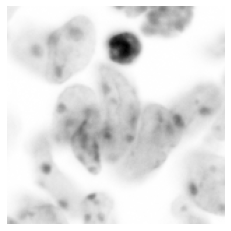

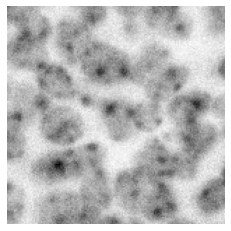

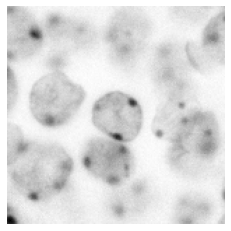

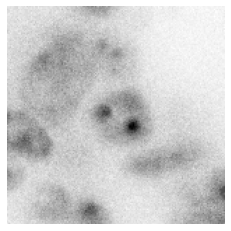

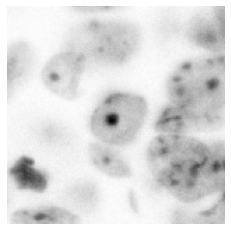

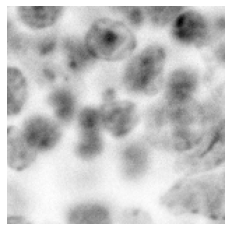

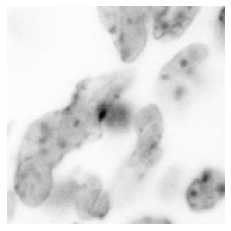

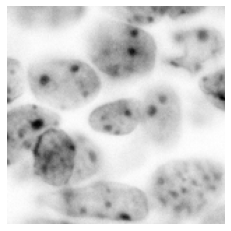

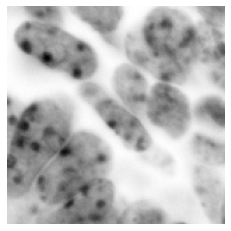

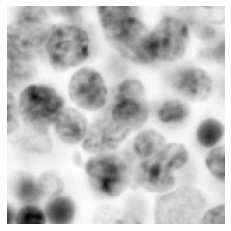

In [37]:
cropped_image_files = glob(os.path.join(raw_crops_dir, "*.tif"))

# Randomly select 10 images
selected_images = random.sample(cropped_image_files, 10)

# Display the selected images
for image_path in selected_images:
    img = plt.imread(image_path)
    plt.imshow(img, cmap = 'gray_r')
    plt.axis('off')
    plt.show()

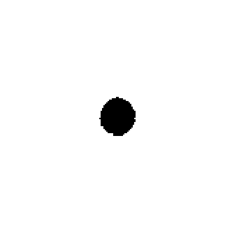

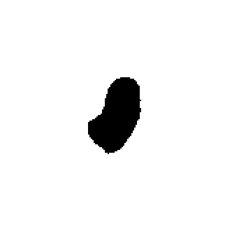

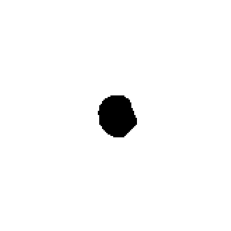

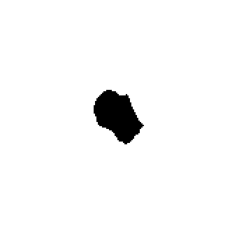

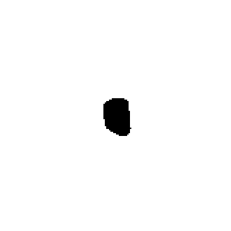

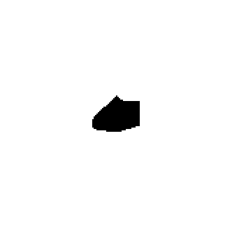

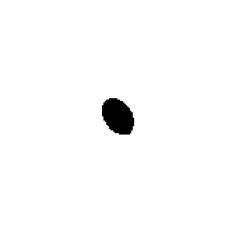

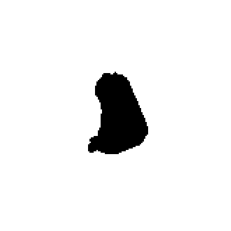

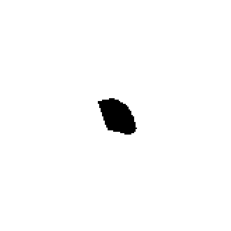

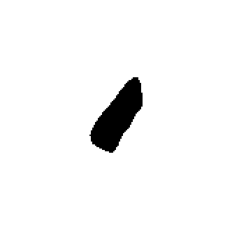

In [38]:
masked_image_files = glob(os.path.join(mask_crops_dir, "*.tif"))

# Randomly select 10 images
selected_images = random.sample(masked_image_files, 10)

# Display the selected images
for image_path in selected_images:
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()